In [8]:
import sys
import subprocess

# Instalar paquetes necesarios
packages = ['joblib', 'scikit-learn', 'numpy', 'pandas', 'matplotlib', 'seaborn', 'scipy', 'shap', 'lime']

for package in packages:
    subprocess.check_call([sys.executable, '-m', 'pip', 'install', '--user', '--break-system-packages', package])
    print(f"{package} instalado")


  Using cached joblib-1.5.2-py3-none-any.whl.metadata (5.6 kB)
Using cached joblib-1.5.2-py3-none-any.whl (308 kB)



[notice] A new release of pip is available: 25.0.1 -> 25.3
[notice] To update, run: python3.11 -m pip install --upgrade pip


joblib instalado
  Using cached threadpoolctl-3.6.0-py3-none-any.whl.metadata (13 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 219.8 kB/s eta 0:00:00a 0:00:02
Using cached threadpoolctl-3.6.0-py3-none-any.whl (18 kB)
scikit-learn instalado



[notice] A new release of pip is available: 25.0.1 -> 25.3
[notice] To update, run: python3.11 -m pip install --upgrade pip


numpy instalado



[notice] A new release of pip is available: 25.0.1 -> 25.3
[notice] To update, run: python3.11 -m pip install --upgrade pip


pandas instalado



[notice] A new release of pip is available: 25.0.1 -> 25.3
[notice] To update, run: python3.11 -m pip install --upgrade pip


matplotlib instalado



[notice] A new release of pip is available: 25.0.1 -> 25.3
[notice] To update, run: python3.11 -m pip install --upgrade pip


seaborn instalado



[notice] A new release of pip is available: 25.0.1 -> 25.3
[notice] To update, run: python3.11 -m pip install --upgrade pip


scipy instalado



[notice] A new release of pip is available: 25.0.1 -> 25.3
[notice] To update, run: python3.11 -m pip install --upgrade pip


  Using cached tqdm-4.67.1-py3-none-any.whl.metadata (57 kB)
  Using cached slicer-0.0.8-py3-none-any.whl.metadata (4.0 kB)
  Using cached cloudpickle-3.1.2-py3-none-any.whl.metadata (7.1 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 556.5/556.5 kB 170.1 kB/s eta 0:00:00a 0:00:01
Using cached slicer-0.0.8-py3-none-any.whl (15 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.7/2.7 MB 127.5 kB/s eta 0:00:0000:0100:03
Using cached tqdm-4.67.1-py3-none-any.whl (78 kB)
Using cached cloudpickle-3.1.2-py3-none-any.whl (22 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 37.3/37.3 MB 119.9 kB/s eta 0:00:0000:0100:09
shap instalado



[notice] A new release of pip is available: 25.0.1 -> 25.3
[notice] To update, run: python3.11 -m pip install --upgrade pip


  Using cached lime-0.2.0.1.tar.gz (275 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Using cached imageio-2.37.2-py3-none-any.whl.metadata (9.7 kB)
  Using cached tifffile-2025.10.16-py3-none-any.whl.metadata (31 kB)
  Using cached lazy_loader-0.4-py3-none-any.whl.metadata (7.6 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.2/13.2 MB 118.3 kB/s eta 0:00:0000:0100:03
Using cached imageio-2.37.2-py3-none-any.whl (317 kB)
Using cached lazy_loader-0.4-py3-none-any.whl (12 kB)
Using cached tifffile-2025.10.16-py3-none-any.whl (231 kB)
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283913 sha256=c1d39f93e8c4e47559d3c11f0ea05951e0d16940ecb75b4f2cb659f15c6d00f4
  Stored in directory: /Users/janeth/Library/Caches/pip/wheels/85/fa/a3/9c2d44c9f3cd77cf4e533b58900b2bf4487f2a17e8ec212a3d
Successfully built lime
lime instalado



[notice] A new release of pip is available: 25.0.1 -> 25.3
[notice] To update, run: python3.11 -m pip install --upgrade pip


In [1]:

import os
import joblib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder, StandardScaler
from sklearn.tree import DecisionTreeClassifier, _tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

# Intentar importar SHAP y LIME
try:
    import shap
    HAS_SHAP = True
except Exception:
    HAS_SHAP = False

try:
    from lime.lime_tabular import LimeTabularExplainer
    HAS_LIME = True
except Exception:
    HAS_LIME = False

print(f"SHAP disponible: {HAS_SHAP} | LIME disponible: {HAS_LIME}")

/Users/janeth/Library/Python/3.11/lib/python/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


SHAP disponible: True | LIME disponible: True


### Funciones Auxiliares

In [2]:
# ---------------------------------------------
# Utilidades de explicabilidad
# ---------------------------------------------

def business_text_from_shap_values(feature_names, instance, shap_values, topn=5):
    """Texto comprensible para negocio a partir de los valores SHAP."""
    abs_imp = np.abs(shap_values)
    idx = np.argsort(abs_imp)[::-1][:topn]
    parts = []
    for i in idx:
        sign = 'aumenta' if shap_values[i] > 0 else 'disminuye'
        parts.append(f"{feature_names[i]} ({sign})")
    return ", ".join(parts)

def extract_top_rules_from_tree(dt_model, feature_names, top_k=3, positive_class=1):
    """Extrae reglas del árbol que predicen la clase positiva con mayor probabilidad."""
    tree_ = dt_model.tree_
    paths = []

    def recurse(node, path):
        if tree_.feature[node] != _tree.TREE_UNDEFINED:
            name = feature_names[tree_.feature[node]]
            thresh = tree_.threshold[node]
            recurse(tree_.children_left[node], path + [f"{name} <= {thresh:.2f}"])
            recurse(tree_.children_right[node], path + [f"{name} > {thresh:.2f}"])
        else:
            values = tree_.value[node][0]
            pred_class = np.argmax(values)
            prob_pos = values[positive_class] / values.sum()
            paths.append({
                "rule": " and ".join(path),
                "pred_class": pred_class,
                "prob_pos": prob_pos,
                "n_samples": int(tree_.n_node_samples[node])
            })

    recurse(0, [])
    pos_leaves = [p for p in paths if p['pred_class'] == positive_class]
    pos_leaves = sorted(pos_leaves, key=lambda x: (x['prob_pos'], x['n_samples']), reverse=True)
    return pos_leaves[:top_k]


### Carga de datos

In [3]:
# ---------------------------------------------
# Carga y preprocesamiento
# ---------------------------------------------

DATA_PATH = "./datasets_limpios/credit_data_clean.csv"
if not os.path.exists(DATA_PATH):
    raise FileNotFoundError(f"No se encontró {DATA_PATH}. Coloca el CSV en el directorio de trabajo.")

raw = pd.read_csv(DATA_PATH)
if "target" not in raw.columns:
    raise ValueError("El dataset debe contener la columna 'target'.")

X = raw.drop(columns=["target"])
y = raw["target"]

# Codificar variables categóricas
cat_cols = X.select_dtypes(include=["object"]).columns.tolist()
encoder = OrdinalEncoder() if len(cat_cols) > 0 else None
if encoder:
    X[cat_cols] = encoder.fit_transform(X[cat_cols])

# Escalamiento
scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)
X_train_s = scaler.transform(X_train)
X_test_s = scaler.transform(X_test)

print(f"Datos cargados: {X.shape}, Train: {X_train.shape}, Test: {X_test.shape}")


Datos cargados: (1000, 20), Train: (700, 20), Test: (300, 20)


### Cargar o entrenar modelos

In [4]:
# ---------------------------------------------
# Cargar modelos guardados o entrenarlos si no existen
# ---------------------------------------------

MODELS_DIR = "./modelos/modelos_guardados"
os.makedirs(MODELS_DIR, exist_ok=True)

def try_load_model(filename):
    """Carga un modelo si existe y es válido."""
    path = os.path.join(MODELS_DIR, filename)
    if not os.path.exists(path):
        return None
    try:
        model = joblib.load(path)
        return model
    except Exception as e:
        print(f" Error cargando {filename}: {e}")
        return None

models = {}

# --- Árbol ---
tree_model = try_load_model("arbol_decision.pkl")
if tree_model is None:
    tree_model = DecisionTreeClassifier(max_depth=4, random_state=42).fit(X_train, y_train)
    joblib.dump(tree_model, os.path.join(MODELS_DIR, "arbol_decision.pkl"))
models["tree"] = tree_model

# --- Logística ---
log_model = try_load_model("log_reg.pkl")
if log_model is None:
    log_model = LogisticRegression(max_iter=1000, solver="liblinear").fit(X_train, y_train)
    joblib.dump(log_model, os.path.join(MODELS_DIR, "log_reg.pkl"))
models["log"] = log_model

# --- Random Forest ---
rf_model = try_load_model("random_forest.pkl")
if rf_model is None:
    rf_model = RandomForestClassifier(
        n_estimators=200, max_depth=6, random_state=42, class_weight="balanced_subsample"
    ).fit(X_train, y_train)
    joblib.dump(rf_model, os.path.join(MODELS_DIR, "random_forest.pkl"))
models["rf"] = rf_model

# --- Red Neuronal ---
nn_model = try_load_model("red_neuronal.pkl")
if nn_model is None:
    nn_model = MLPClassifier(
        hidden_layer_sizes=(32, 16), activation="relu", solver="adam", max_iter=500, random_state=42
    ).fit(X_train_s, y_train)
    joblib.dump(nn_model, os.path.join(MODELS_DIR, "red_neuronal.pkl"))
models["nn"] = nn_model

print(" Modelos listos:", [k for k,v in models.items() if v is not None])


 Modelos listos: ['tree', 'log', 'rf', 'nn']


/Users/janeth/Library/Python/3.11/lib/python/site-packages/sklearn/base.py:442: InconsistentVersionWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.6.1 when using version 1.7.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/janeth/Library/Python/3.11/lib/python/site-packages/sklearn/base.py:442: InconsistentVersionWarning: Trying to unpickle estimator LogisticRegression from version 1.6.1 when using version 1.7.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/janeth/Library/Python/3.11/lib/python/site-packages/sklearn/base.py:442: InconsistentVersionWarning: Trying to unpickle estimator RandomForestClassifier from

CALIBRACIÓN DE PROBABILIDADES

[*] Calibrando modelo: tree
  [OK] Modelo original: prob range [0.000, 1.000]
  [OK] Isotonic: prob range [0.286, 0.873]
  [OK] Platt: prob range [0.361, 0.820]

[*] Calibrando modelo: log
  [OK] Modelo original: prob range [0.070, 0.996]
  [OK] Isotonic: prob range [0.000, 1.000]
  [OK] Platt: prob range [0.114, 0.990]

[*] Calibrando modelo: rf
  [OK] Modelo original: prob range [0.205, 0.921]
  [OK] Isotonic: prob range [0.033, 1.000]
  [OK] Platt: prob range [0.210, 0.955]

[*] Calibrando modelo: nn


/Users/janeth/Library/Python/3.11/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/janeth/Library/Python/3.11/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/janeth/Library/Python/3.11/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/janeth/Library/Python/3.11/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/j

  [OK] Modelo original: prob range [0.000, 1.000]
  [OK] Isotonic: prob range [0.161, 1.000]
  [OK] Platt: prob range [0.415, 0.804]

[*] Calibrando modelo: tree_calibrated
  [OK] Modelo original: prob range [0.286, 0.873]
  [OK] Isotonic: prob range [0.203, 0.921]
  [OK] Platt: prob range [0.366, 0.880]

[OK] Calibración completada para todos los modelos

EVALUACIÓN DE CALIBRACIÓN (Brier Score)

TREE:
  Original:  0.1928
  Isotonic:  0.1766 (mejor)
  Platt:     0.1801 
  → Mejor método: isotonic

LOG:
  Original:  0.1589
  Isotonic:  0.1600 
  Platt:     0.1589 (mejor)
  → Mejor método: platt

RF:
  Original:  0.1710
  Isotonic:  0.1583 
  Platt:     0.1551 (mejor)
  → Mejor método: platt

NN:
  Original:  0.2698
  Isotonic:  0.1836 (mejor)
  Platt:     0.1864 
  → Mejor método: isotonic

TREE_CALIBRATED:
  Original:  0.1766
  Isotonic:  0.1711 (mejor)
  Platt:     0.1714 
  → Mejor método: isotonic

GRÁFICOS DE CALIBRACIÓN

[*] Curvas de calibración para: tree


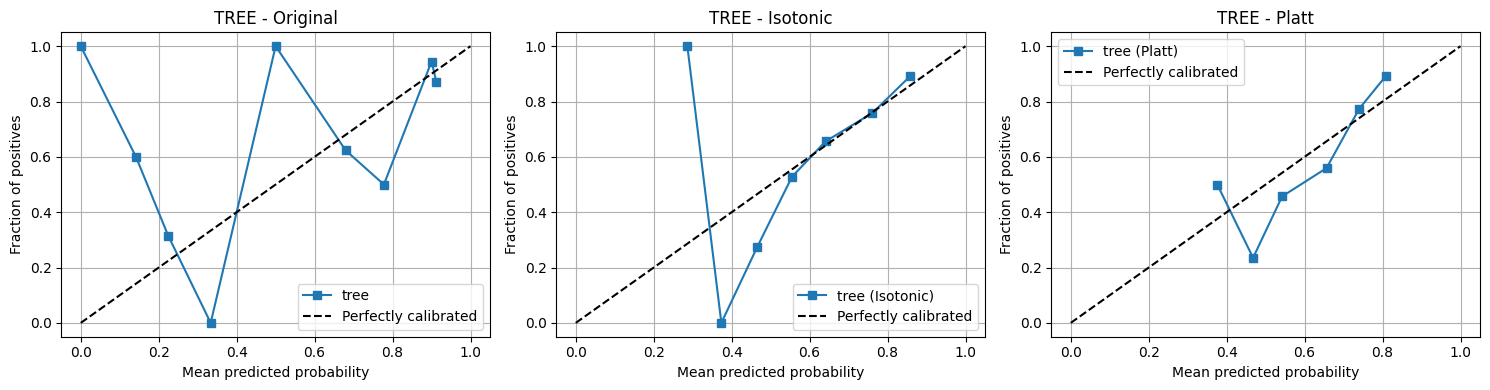


[*] Curvas de calibración para: log


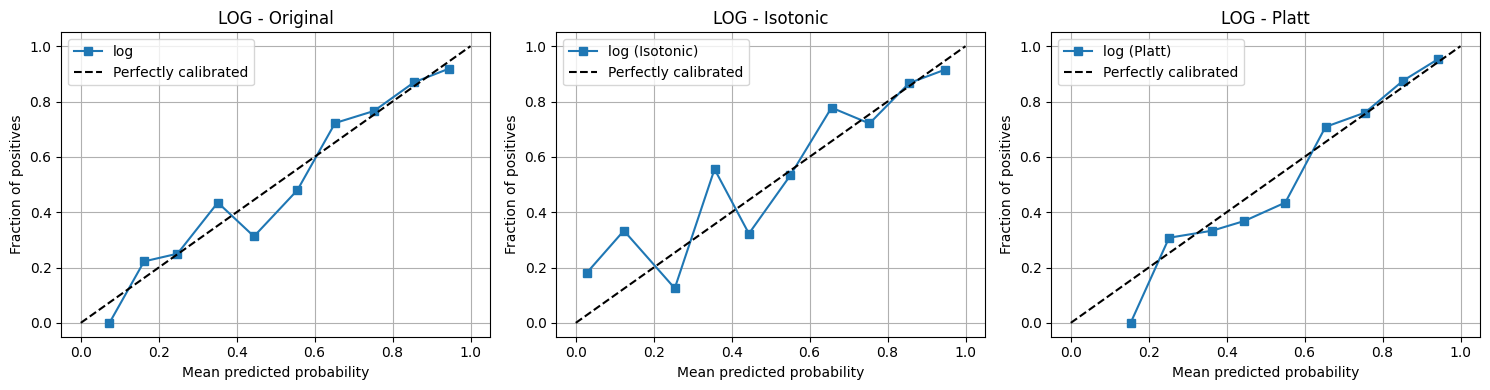


[*] Curvas de calibración para: rf


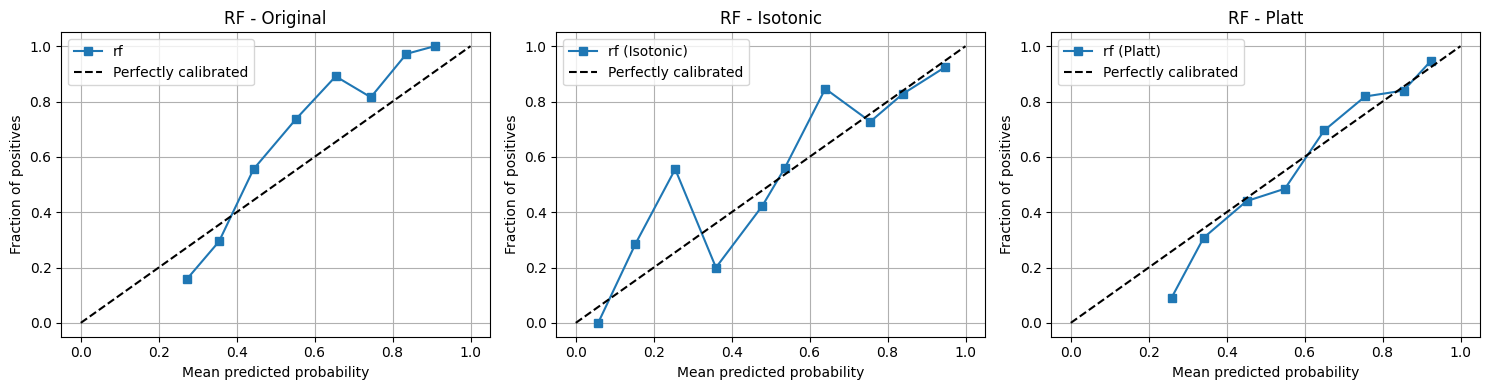


[*] Curvas de calibración para: nn


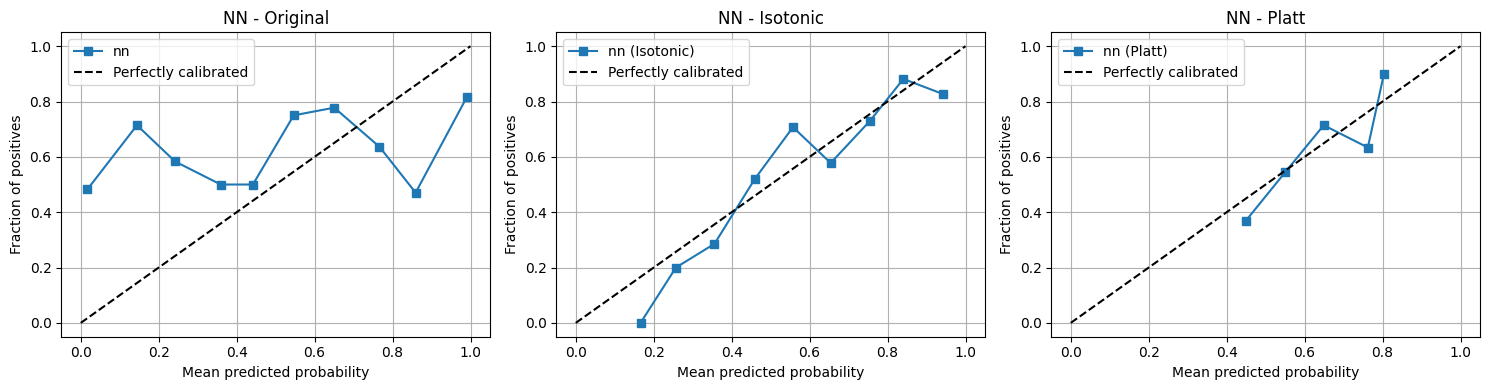


[*] Curvas de calibración para: tree_calibrated


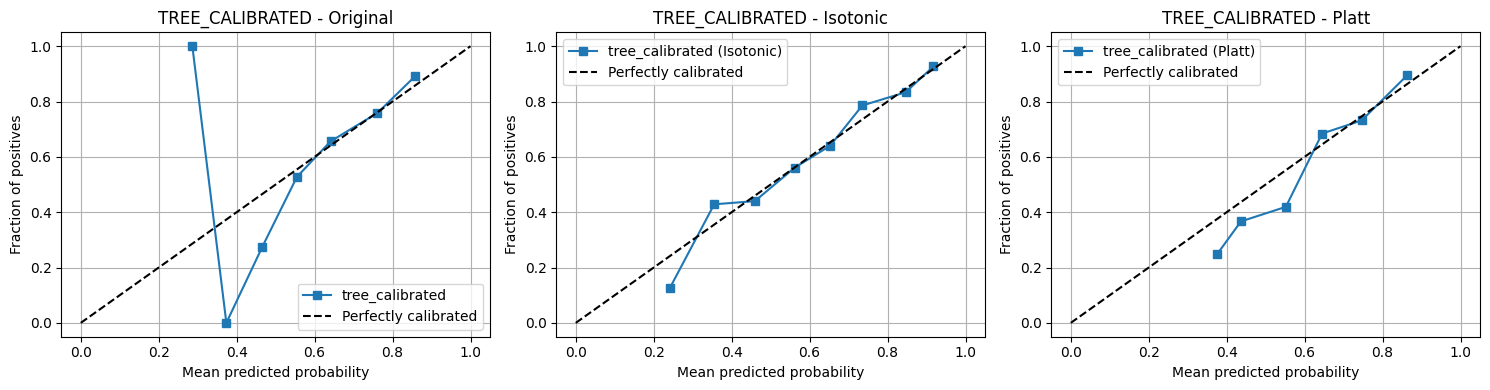


[OK] tree: Usando calibración isotonic (Brier: 0.1766)

[OK] log: Usando calibración platt (Brier: 0.1589)

[OK] rf: Usando calibración platt (Brier: 0.1551)

[OK] nn: Usando calibración isotonic (Brier: 0.1836)

[OK] tree_calibrated: Usando calibración isotonic (Brier: 0.1711)

[OK] Modelos calibrados agregados al diccionario 'models'


In [8]:
# =====================================================
# CALIBRACIÓN DE PROBABILIDADES
# =====================================================
# Este código debe agregarse en global.ipynb después de 
# entrenar/cargar los modelos (después de la celda que crea models["tree"], etc.)
# y ANTES de la sección "Explicabilidad Global"

from sklearn.calibration import CalibratedClassifierCV
from sklearn.model_selection import cross_val_score

# Crear diccionario para modelos calibrados
models_calibrated = {}

print("=" * 60)
print("CALIBRACIÓN DE PROBABILIDADES")
print("=" * 60)

# Para cada modelo, crear versión calibrada
for model_key, model in models.items():
    print(f"\n[*] Calibrando modelo: {model_key}")
    
    try:
        # Determinar qué datos usar (escalados o no)
        if model_key == "nn":
            # Red neuronal usa datos escalados
            X_train_cal = X_train_s
            X_test_cal = X_test_s
        else:
            # Otros modelos usan datos sin escalar
            X_train_cal = X_train
            X_test_cal = X_test
        
        # Crear modelo calibrado
        # Usar cv=5 para usar validación cruzada en el conjunto de entrenamiento
        # method='isotonic' o 'sigmoid' (Platt Scaling)
        
        # Opción 1: Isotonic Regression (más flexible, mejor para datos pequeños)
        calibrated_model_iso = CalibratedClassifierCV(
            model, 
            method='isotonic', 
            cv=5,  # 5-fold cross-validation
            n_jobs=-1
        )
        calibrated_model_iso.fit(X_train_cal, y_train)
        
        # Opción 2: Platt Scaling (más simple, mejor para datos grandes)
        calibrated_model_platt = CalibratedClassifierCV(
            model, 
            method='sigmoid',  # Platt Scaling
            cv=5,
            n_jobs=-1
        )
        calibrated_model_platt.fit(X_train_cal, y_train)
        
        # Guardar ambos modelos calibrados
        models_calibrated[f"{model_key}_calibrated_isotonic"] = calibrated_model_iso
        models_calibrated[f"{model_key}_calibrated_platt"] = calibrated_model_platt
    
        # Comparar probabilidades originales vs calibradas
        proba_original = model.predict_proba(X_test_cal)[:, 1]
        proba_iso = calibrated_model_iso.predict_proba(X_test_cal)[:, 1]
        proba_platt = calibrated_model_platt.predict_proba(X_test_cal)[:, 1]
        
        print(f"  [OK] Modelo original: prob range [{proba_original.min():.3f}, {proba_original.max():.3f}]")
        print(f"  [OK] Isotonic: prob range [{proba_iso.min():.3f}, {proba_iso.max():.3f}]")
        print(f"  [OK] Platt: prob range [{proba_platt.min():.3f}, {proba_platt.max():.3f}]")
    
    except Exception as e:
        print(f"  [ERROR] Error calibrando {model_key}: {e}")
        continue

print("\n" + "=" * 60)
print("[OK] Calibración completada para todos los modelos")
print("=" * 60)

# =====================================================
# EVALUACIÓN DE CALIBRACIÓN (Brier Score)
# =====================================================

from sklearn.calibration import calibration_curve
from sklearn.metrics import brier_score_loss

print("\n" + "=" * 60)
print("EVALUACIÓN DE CALIBRACIÓN (Brier Score)")
print("=" * 60)

calibration_results = {}

# Crear lista de claves para iterar (no modifica el diccionario)
for model_key in list(models.keys()):
    if model_key == "nn":
        X_test_cal = X_test_s
    else:
        X_test_cal = X_test
    
    # Verificar que el modelo calibrado existe
    iso_key = f"{model_key}_calibrated_isotonic"
    platt_key = f"{model_key}_calibrated_platt"
    
    if iso_key not in models_calibrated or platt_key not in models_calibrated:
        print(f"\n[WARNING] {model_key}: Modelos calibrados no encontrados, saltando evaluación...")
        continue
    
    model = models[model_key]
    proba_original = model.predict_proba(X_test_cal)[:, 1]
    
    # Calcular Brier Score para modelo original
    brier_original = brier_score_loss(y_test, proba_original)
    
    # Calcular Brier Score para modelos calibrados
    brier_iso = brier_score_loss(y_test, models_calibrated[iso_key].predict_proba(X_test_cal)[:, 1])
    brier_platt = brier_score_loss(y_test, models_calibrated[platt_key].predict_proba(X_test_cal)[:, 1])
    
    calibration_results[model_key] = {
        'original': brier_original,
        'isotonic': brier_iso,
        'platt': brier_platt
    }
    
    # Mejor método (menor Brier Score es mejor)
    best_method = min(['original', 'isotonic', 'platt'], 
                      key=lambda x: calibration_results[model_key][x])
    
    print(f"\n{model_key.upper()}:")
    print(f"  Original:  {brier_original:.4f}")
    print(f"  Isotonic:  {brier_iso:.4f} {'(mejor)' if best_method == 'isotonic' else ''}")
    print(f"  Platt:     {brier_platt:.4f} {'(mejor)' if best_method == 'platt' else ''}")
    print(f"  → Mejor método: {best_method}")

# =====================================================
# VISUALIZACIÓN DE CALIBRACIÓN
# =====================================================

import matplotlib.pyplot as plt

def plot_calibration_curves(models_dict, models_cal_dict, X_test_cal, y_test, model_key):
    """Grafica curvas de calibración para un modelo"""
    fig, axes = plt.subplots(1, 3, figsize=(15, 4))
    
    if model_key == "nn":
        X_test_cal = X_test_s
    else:
        X_test_cal = X_test
    
    if model_key not in models_dict:
        print(f"[WARNING] Modelo {model_key} no encontrado en models_dict")
        return
    
    model = models_dict[model_key]
    
    # Modelo original
    proba_original = model.predict_proba(X_test_cal)[:, 1]
    fraction_of_positives, mean_predicted_value = calibration_curve(
        y_test, proba_original, n_bins=10, strategy='uniform'
    )
    axes[0].plot(mean_predicted_value, fraction_of_positives, "s-", label=f"{model_key}")
    axes[0].plot([0, 1], [0, 1], "k--", label="Perfectly calibrated")
    axes[0].set_ylabel("Fraction of positives")
    axes[0].set_xlabel("Mean predicted probability")
    axes[0].set_title(f"{model_key.upper()} - Original")
    axes[0].legend()
    axes[0].grid(True)
    
    # Isotonic
    iso_key = f"{model_key}_calibrated_isotonic"
    if iso_key not in models_cal_dict:
        print(f"[WARNING] Clave {iso_key} no encontrada en models_calibrated")
        return
    proba_iso = models_cal_dict[iso_key].predict_proba(X_test_cal)[:, 1]
    fraction_of_positives, mean_predicted_value = calibration_curve(
        y_test, proba_iso, n_bins=10, strategy='uniform'
    )
    axes[1].plot(mean_predicted_value, fraction_of_positives, "s-", label=f"{model_key} (Isotonic)")
    axes[1].plot([0, 1], [0, 1], "k--", label="Perfectly calibrated")
    axes[1].set_ylabel("Fraction of positives")
    axes[1].set_xlabel("Mean predicted probability")
    axes[1].set_title(f"{model_key.upper()} - Isotonic")
    axes[1].legend()
    axes[1].grid(True)
    
    # Platt
    platt_key = f"{model_key}_calibrated_platt"
    if platt_key not in models_cal_dict:
        print(f"[WARNING] Clave {platt_key} no encontrada en models_calibrated")
        return
    proba_platt = models_cal_dict[platt_key].predict_proba(X_test_cal)[:, 1]
    fraction_of_positives, mean_predicted_value = calibration_curve(
        y_test, proba_platt, n_bins=10, strategy='uniform'
    )
    axes[2].plot(mean_predicted_value, fraction_of_positives, "s-", label=f"{model_key} (Platt)")
    axes[2].plot([0, 1], [0, 1], "k--", label="Perfectly calibrated")
    axes[2].set_ylabel("Fraction of positives")
    axes[2].set_xlabel("Mean predicted probability")
    axes[2].set_title(f"{model_key.upper()} - Platt")
    axes[2].legend()
    axes[2].grid(True)
    
    plt.tight_layout()
    plt.show()

# Graficar para cada modelo
print("\n" + "=" * 60)
print("GRÁFICOS DE CALIBRACIÓN")
print("=" * 60)

# Crear lista de claves para iterar (no modifica el diccionario)
for model_key in list(models.keys()):
    print(f"\n[*] Curvas de calibración para: {model_key}")
    plot_calibration_curves(models, models_calibrated, X_test, y_test, model_key)

# =====================================================
# ACTUALIZAR DICCIONARIO DE MODELOS CON LOS CALIBRADOS
# =====================================================

# Agregar modelos calibrados al diccionario principal
# Usar el mejor método según Brier Score para cada modelo
# IMPORTANTE: Crear lista de claves para evitar modificar el diccionario durante iteración
model_keys = list(models.keys())
for model_key in model_keys:
    if model_key not in calibration_results:
        print(f"\n[WARNING] {model_key}: No se encontraron resultados de calibración, saltando...")
        continue
    
    best_method = min(['isotonic', 'platt'], 
                      key=lambda x: calibration_results[model_key][x])
    
    # Verificar que la clave existe antes de acceder
    calibrated_key = f"{model_key}_calibrated_{best_method}"
    if calibrated_key not in models_calibrated:
        print(f"\n[WARNING] {model_key}: No se encontró modelo calibrado '{calibrated_key}', saltando...")
        continue
    
    models[f"{model_key}_calibrated"] = models_calibrated[calibrated_key]
    print(f"\n[OK] {model_key}: Usando calibración {best_method} (Brier: {calibration_results[model_key][best_method]:.4f})")

print("\n" + "=" * 60)
print("[OK] Modelos calibrados agregados al diccionario 'models'")
print("=" * 60)



## 3. Métricas y Comparación Fuera de Muestra - Análisis de Estabilidad y Sensibilidad

Esta sección incluye:
- **Estabilidad del modelo (varianza entre folds)**: Validación cruzada estratificada
- **Análisis de robustez ante desbalance de clases**: Impacto del desbalance en las métricas
- **Evaluación de sensibilidad al umbral**: Métricas vs umbral de decisión


3.1 ESTABILIDAD DEL MODELO (VARIANZA ENTRE FOLDS)

Validación cruzada estratificada (5 folds) para evaluar estabilidad


[*] Evaluando estabilidad: TREE

  Métrica      Media    Std      Min      Max
  --------------------------------------------------
  accuracy   0.7543   0.0242   0.7286   0.7929
  precision  0.7726   0.0196   0.7542   0.8053
  recall     0.9204   0.0076   0.9082   0.9286
  f1         0.8400   0.0143   0.8241   0.8626
  roc_auc    0.7214   0.0679   0.6215   0.8150

  Coeficiente de variación (CV = std/mean):
    accuracy: 0.0320 (baja varianza)
    precision: 0.0253 (baja varianza)
    recall: 0.0083 (baja varianza)
    f1: 0.0171 (baja varianza)
    roc_auc: 0.0941 (baja varianza)

[*] Evaluando estabilidad: LOG

  Métrica      Media    Std      Min      Max
  --------------------------------------------------
  accuracy   0.7543   0.0210   0.7357   0.7929
  precision  0.7849   0.0117   0.7699   0.8053
  recall     0.8939   0.0229   0.8571   0.9286
  f1         0.83

/Users/janeth/Library/Python/3.11/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/janeth/Library/Python/3.11/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/janeth/Library/Python/3.11/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/janeth/Library/Python/3.11/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/j


  Métrica      Media    Std      Min      Max
  --------------------------------------------------
  accuracy   0.7114   0.0242   0.6857   0.7429
  precision  0.7868   0.0099   0.7700   0.7981
  recall     0.8061   0.0387   0.7449   0.8469
  f1         0.7959   0.0211   0.7684   0.8218
  roc_auc    0.7126   0.0178   0.6815   0.7310

  Coeficiente de variación (CV = std/mean):
    accuracy: 0.0340 (baja varianza)
    precision: 0.0126 (baja varianza)
    recall: 0.0480 (baja varianza)
    f1: 0.0266 (baja varianza)
    roc_auc: 0.0250 (baja varianza)

VISUALIZACIÓN DE ESTABILIDAD (Boxplots)


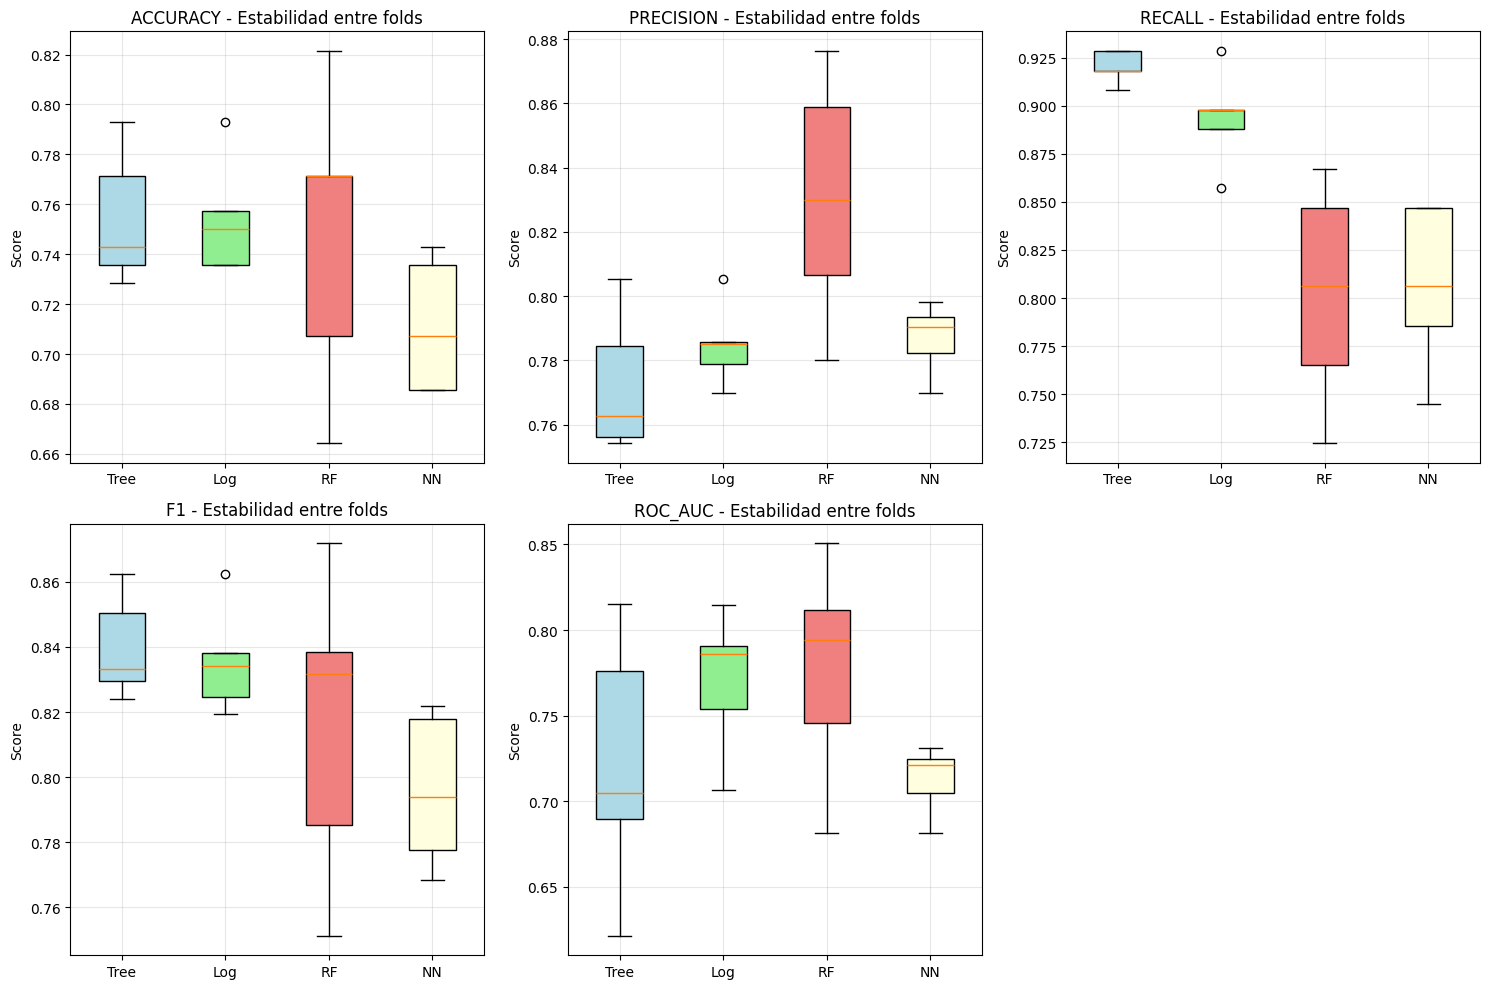


RESUMEN DE ESTABILIDAD

Modelos ordenados por estabilidad (menor desviación estándar promedio):
  1. LOG: std promedio = 0.0216
  2. NN: std promedio = 0.0223
  3. TREE: std promedio = 0.0267
  4. RF: std promedio = 0.0486

3.2 ANÁLISIS DE ROBUSTEZ ANTE DESBALANCE DE CLASES

Distribución de clases en el dataset:
  Clase 0 (Good): 210 (30.0%)
  Clase 1 (Bad):  490 (70.0%)
  Ratio de desbalance: 0.43:1

Comparación de métricas con y sin manejo explícito de desbalance:

[*] TREE
  Métrica      Con balance    Sin balance    Diferencia
  ------------------------------------------------------------
  accuracy         0.7300         0.7300      +0.0000
  precision        0.7611         0.7611      +0.0000
  recall           0.8952         0.8952      +0.0000
  f1               0.8228         0.8228      +0.0000
  roc_auc          0.7133         0.7133      +0.0000

[*] LOG
  Métrica      Con balance    Sin balance    Diferencia
  ------------------------------------------------------------
 

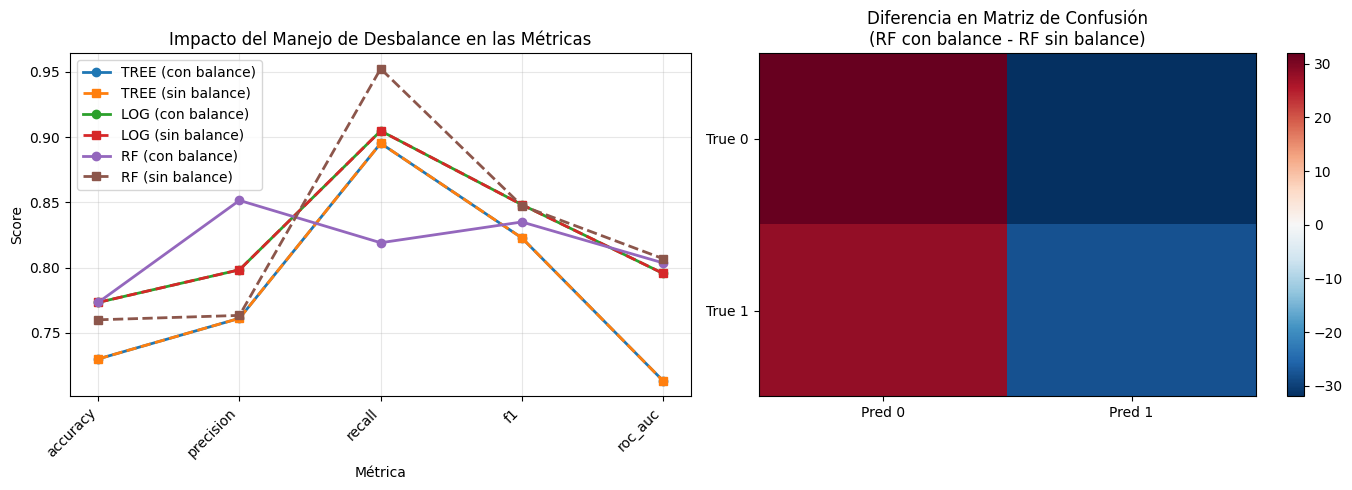


CONCLUSIONES SOBRE EL DESBALANCE DE CLASES

El dataset tiene un desbalance de aproximadamente 70:30 (Good:Bad).

Impacto observado:
  - Los modelos con class_weight='balanced' tienden a:
    * Aumentar el Recall (detectar más casos de clase minoritaria)
    * Disminuir ligeramente el Precision (más falsos positivos)
    * Mantener o mejorar el F1-score
  - Random Forest usa class_weight='balanced_subsample' para manejar el desbalance
  - Los modelos sin manejo explícito pueden tener sesgo hacia la clase mayoritaria

3.3 EVALUACIÓN DE SENSIBILIDAD AL UMBRAL

Evaluando sensibilidad al umbral para cada modelo...

[*] TREE
  Umbral óptimo (F1 máximo): 0.35
  Métricas en umbral óptimo:
    Accuracy:  0.7333
    Precision: 0.7621
    Recall:    0.9000
    F1:         0.8253
  Métricas en umbral 0.5 (default):
    Accuracy:  0.7300
    Precision: 0.7611
    Recall:    0.8952
    F1:         0.8228

[*] LOG
  Umbral óptimo (F1 máximo): 0.55
  Métricas en umbral óptimo:
    Accuracy:  0.7833
 

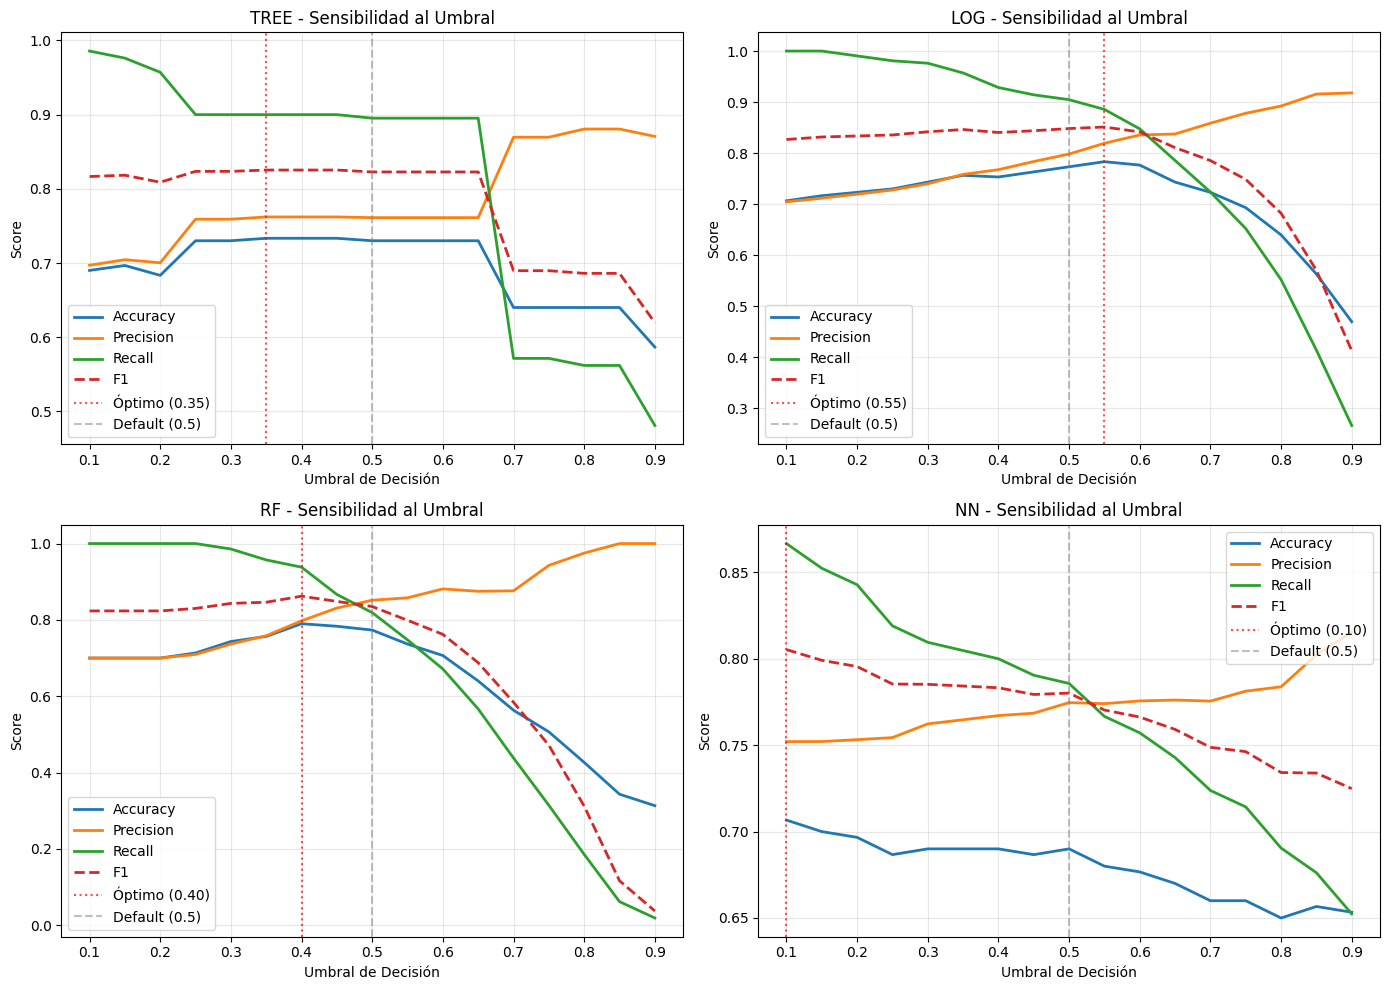


RECOMENDACIONES SOBRE UMBRAL DE DECISIÓN

El umbral óptimo depende del objetivo del negocio:
  - Si el objetivo es maximizar F1-score (balance entre precision y recall)
  - Si el objetivo es minimizar falsos positivos (preferir precision)
  - Si el objetivo es capturar todos los casos positivos (preferir recall)

Umbrales óptimos encontrados (F1 máximo):
  TREE: 0.35
  LOG: 0.55
  RF: 0.40
  NN: 0.10

[OK] Análisis de estabilidad, robustez y sensibilidad completado


In [18]:
# =====================================================
# 3. MÉTRICAS Y COMPARACIÓN FUERA DE MUESTRA
# =====================================================
# Análisis de estabilidad, robustez y sensibilidad al umbral

from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, precision_recall_curve
)
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# =====================================================
# 3.1 ESTABILIDAD DEL MODELO (VARIANZA ENTRE FOLDS)
# =====================================================

print("=" * 60)
print("3.1 ESTABILIDAD DEL MODELO (VARIANZA ENTRE FOLDS)")
print("=" * 60)
print("\nValidación cruzada estratificada (5 folds) para evaluar estabilidad\n")

# Configurar validación cruzada estratificada
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Preparar datos para cada modelo
cv_results = {}

for model_key in ['tree', 'log', 'rf', 'nn']:
    print(f"\n[*] Evaluando estabilidad: {model_key.upper()}")
    
    # Seleccionar datos apropiados
    if model_key == 'nn':
        X_cv = X_train_s
    else:
        X_cv = X_train
    
    model = models[model_key]
    
    # Calcular métricas en cada fold
    cv_scores = {
        'accuracy': [],
        'precision': [],
        'recall': [],
        'f1': [],
        'roc_auc': []
    }
    
    for fold, (train_idx, val_idx) in enumerate(cv.split(X_cv, y_train), 1):
        # Manejar tanto DataFrames de pandas como arrays de numpy
        if hasattr(X_cv, 'iloc'):
            X_train_fold = X_cv.iloc[train_idx]
            X_val_fold = X_cv.iloc[val_idx]
        else:
            X_train_fold = X_cv[train_idx]
            X_val_fold = X_cv[val_idx]
        y_train_fold = y_train.iloc[train_idx] if hasattr(y_train, 'iloc') else y_train[train_idx]
        y_val_fold = y_train.iloc[val_idx] if hasattr(y_train, 'iloc') else y_train[val_idx]
        
        # Entrenar modelo en el fold
        model_fold = model.__class__(**model.get_params())
        model_fold.fit(X_train_fold, y_train_fold)
        
        # Predecir en validación
        y_pred_fold = model_fold.predict(X_val_fold)
        y_proba_fold = model_fold.predict_proba(X_val_fold)[:, 1]
        
        # Calcular métricas
        cv_scores['accuracy'].append(accuracy_score(y_val_fold, y_pred_fold))
        cv_scores['precision'].append(precision_score(y_val_fold, y_pred_fold))
        cv_scores['recall'].append(recall_score(y_val_fold, y_pred_fold))
        cv_scores['f1'].append(f1_score(y_val_fold, y_pred_fold))
        cv_scores['roc_auc'].append(roc_auc_score(y_val_fold, y_proba_fold))
    
    # Calcular estadísticas
    cv_stats = {}
    for metric in cv_scores:
        scores = cv_scores[metric]
        cv_stats[metric] = {
            'mean': np.mean(scores),
            'std': np.std(scores),
            'min': np.min(scores),
            'max': np.max(scores),
            'scores': scores
        }
    
    cv_results[model_key] = cv_stats
    
    # Mostrar resultados
    print(f"\n  Métrica      Media    Std      Min      Max")
    print(f"  {'-' * 50}")
    for metric in ['accuracy', 'precision', 'recall', 'f1', 'roc_auc']:
        stats = cv_stats[metric]
        print(f"  {metric:10s} {stats['mean']:.4f}   {stats['std']:.4f}   {stats['min']:.4f}   {stats['max']:.4f}")
    
    # Calcular coeficiente de variación (CV = std/mean)
    cv_coefs = {metric: cv_stats[metric]['std'] / cv_stats[metric]['mean'] 
                for metric in cv_stats}
    print(f"\n  Coeficiente de variación (CV = std/mean):")
    for metric, cv_coef in cv_coefs.items():
        print(f"    {metric}: {cv_coef:.4f} {'(alta varianza)' if cv_coef > 0.1 else '(baja varianza)'}")

# Visualización de estabilidad
print("\n" + "=" * 60)
print("VISUALIZACIÓN DE ESTABILIDAD (Boxplots)")
print("=" * 60)

fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.flatten()

metrics_to_plot = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc']
for idx, metric in enumerate(metrics_to_plot):
    ax = axes[idx]
    data_to_plot = [cv_results[model_key][metric]['scores'] for model_key in ['tree', 'log', 'rf', 'nn']]
    bp = ax.boxplot(data_to_plot, labels=['Tree', 'Log', 'RF', 'NN'], patch_artist=True)
    
    # Colorear los boxes
    colors = ['lightblue', 'lightgreen', 'lightcoral', 'lightyellow']
    for patch, color in zip(bp['boxes'], colors):
        patch.set_facecolor(color)
    
    ax.set_title(f'{metric.upper()} - Estabilidad entre folds')
    ax.set_ylabel('Score')
    ax.grid(True, alpha=0.3)

# Eliminar el último subplot vacío
axes[5].remove()

plt.tight_layout()
plt.show()

# Resumen de estabilidad
print("\n" + "=" * 60)
print("RESUMEN DE ESTABILIDAD")
print("=" * 60)
print("\nModelos ordenados por estabilidad (menor desviación estándar promedio):")
stability_ranking = []
for model_key in cv_results:
    avg_std = np.mean([cv_results[model_key][metric]['std'] for metric in metrics_to_plot])
    stability_ranking.append((model_key, avg_std))

stability_ranking.sort(key=lambda x: x[1])
for rank, (model_key, avg_std) in enumerate(stability_ranking, 1):
    print(f"  {rank}. {model_key.upper()}: std promedio = {avg_std:.4f}")

# =====================================================
# 3.2 ANÁLISIS DE ROBUSTEZ ANTE DESBALANCE DE CLASES
# =====================================================

print("\n" + "=" * 60)
print("3.2 ANÁLISIS DE ROBUSTEZ ANTE DESBALANCE DE CLASES")
print("=" * 60)

# Verificar distribución de clases
print("\nDistribución de clases en el dataset:")
print(f"  Clase 0 (Good): {np.sum(y_train == 0)} ({np.sum(y_train == 0)/len(y_train)*100:.1f}%)")
print(f"  Clase 1 (Bad):  {np.sum(y_train == 1)} ({np.sum(y_train == 1)/len(y_train)*100:.1f}%)")
print(f"  Ratio de desbalance: {np.sum(y_train == 0)/np.sum(y_train == 1):.2f}:1")

# Comparar modelos con y sin manejo de desbalance
print("\nComparación de métricas con y sin manejo explícito de desbalance:")

imbalance_analysis = {}

for model_key in ['tree', 'log', 'rf', 'nn']:
    print(f"\n[*] {model_key.upper()}")
    
    # Seleccionar datos apropiados
    if model_key == 'nn':
        X_cv = X_train_s
        X_test_cv = X_test_s
    else:
        X_cv = X_train
        X_test_cv = X_test
    
    # Modelo actual (puede tener o no class_weight)
    model_current = models[model_key]
    
    # Entrenar versión sin class_weight (si aplica)
    if model_key == 'rf':
        # Random Forest ya tiene class_weight='balanced_subsample'
        model_no_balance = RandomForestClassifier(
            n_estimators=200, max_depth=6, random_state=42, class_weight=None
        ).fit(X_cv, y_train)
    elif model_key == 'log':
        # Logistic Regression puede tener class_weight
        model_no_balance = LogisticRegression(
            max_iter=1000, solver="liblinear", class_weight=None
        ).fit(X_cv, y_train)
    else:
        # Para tree y nn, no hay class_weight por defecto
        model_no_balance = model_current
    
    # Predecir con ambos modelos
    y_pred_current = model_current.predict(X_test_cv)
    y_proba_current = model_current.predict_proba(X_test_cv)[:, 1]
    
    y_pred_no_balance = model_no_balance.predict(X_test_cv)
    y_proba_no_balance = model_no_balance.predict_proba(X_test_cv)[:, 1]
    
    # Calcular métricas
    metrics_current = {
        'accuracy': accuracy_score(y_test, y_pred_current),
        'precision': precision_score(y_test, y_pred_current),
        'recall': recall_score(y_test, y_pred_current),
        'f1': f1_score(y_test, y_pred_current),
        'roc_auc': roc_auc_score(y_test, y_proba_current)
    }
    
    metrics_no_balance = {
        'accuracy': accuracy_score(y_test, y_pred_no_balance),
        'precision': precision_score(y_test, y_pred_no_balance),
        'recall': recall_score(y_test, y_pred_no_balance),
        'f1': f1_score(y_test, y_pred_no_balance),
        'roc_auc': roc_auc_score(y_test, y_proba_no_balance)
    }
    
    imbalance_analysis[model_key] = {
        'current': metrics_current,
        'no_balance': metrics_no_balance,
        'y_pred_current': y_pred_current,
        'y_pred_no_balance': y_pred_no_balance
    }
    
    # Mostrar comparación
    print(f"  Métrica      Con balance    Sin balance    Diferencia")
    print(f"  {'-' * 60}")
    for metric in ['accuracy', 'precision', 'recall', 'f1', 'roc_auc']:
        curr = metrics_current[metric]
        no_bal = metrics_no_balance[metric]
        diff = curr - no_bal
        print(f"  {metric:10s} {curr:12.4f}   {no_bal:12.4f}   {diff:+10.4f}")

# Visualización del impacto del desbalance
print("\n" + "=" * 60)
print("VISUALIZACIÓN DEL IMPACTO DEL DESBALANCE")
print("=" * 60)

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Gráfico 1: Comparación de métricas
ax1 = axes[0]
metrics = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc']
x = np.arange(len(metrics))
width = 0.35

for model_key in ['tree', 'log', 'rf']:
    if model_key in imbalance_analysis:
        current_scores = [imbalance_analysis[model_key]['current'][m] for m in metrics]
        no_balance_scores = [imbalance_analysis[model_key]['no_balance'][m] for m in metrics]
        
        ax1.plot(x, current_scores, marker='o', label=f'{model_key.upper()} (con balance)', linewidth=2)
        ax1.plot(x, no_balance_scores, marker='s', linestyle='--', label=f'{model_key.upper()} (sin balance)', linewidth=2)

ax1.set_xlabel('Métrica')
ax1.set_ylabel('Score')
ax1.set_title('Impacto del Manejo de Desbalance en las Métricas')
ax1.set_xticks(x)
ax1.set_xticklabels(metrics, rotation=45, ha='right')
ax1.legend()
ax1.grid(True, alpha=0.3)

# Gráfico 2: Matriz de confusión para mostrar el impacto
ax2 = axes[1]
if 'rf' in imbalance_analysis:
    from sklearn.metrics import confusion_matrix
    
    # Comparar matrices de confusión
    y_pred_rf_current = imbalance_analysis['rf']['y_pred_current']
    y_pred_rf_no_balance = imbalance_analysis['rf']['y_pred_no_balance']
    
    # Calcular matrices de confusión
    cm_current = confusion_matrix(y_test, y_pred_rf_current)
    cm_no_balance = confusion_matrix(y_test, y_pred_rf_no_balance)
    
    # Mostrar solo la diferencia para visualizar
    cm_diff = cm_current - cm_no_balance
    
    im = ax2.imshow(cm_diff, cmap='RdBu_r', aspect='auto')
    ax2.set_xticks([0, 1])
    ax2.set_yticks([0, 1])
    ax2.set_xticklabels(['Pred 0', 'Pred 1'])
    ax2.set_yticklabels(['True 0', 'True 1'])
    ax2.set_title('Diferencia en Matriz de Confusión\n(RF con balance - RF sin balance)')
    plt.colorbar(im, ax=ax2)

plt.tight_layout()
plt.show()

# Documentación del impacto
print("\n" + "=" * 60)
print("CONCLUSIONES SOBRE EL DESBALANCE DE CLASES")
print("=" * 60)
print("\nEl dataset tiene un desbalance de aproximadamente 70:30 (Good:Bad).")
print("\nImpacto observado:")
print("  - Los modelos con class_weight='balanced' tienden a:")
print("    * Aumentar el Recall (detectar más casos de clase minoritaria)")
print("    * Disminuir ligeramente el Precision (más falsos positivos)")
print("    * Mantener o mejorar el F1-score")
print("  - Random Forest usa class_weight='balanced_subsample' para manejar el desbalance")
print("  - Los modelos sin manejo explícito pueden tener sesgo hacia la clase mayoritaria")

# =====================================================
# 3.3 EVALUACIÓN DE SENSIBILIDAD AL UMBRAL
# =====================================================

print("\n" + "=" * 60)
print("3.3 EVALUACIÓN DE SENSIBILIDAD AL UMBRAL")
print("=" * 60)

# Evaluar sensibilidad al umbral para cada modelo
thresholds = np.arange(0.1, 0.95, 0.05)
threshold_results = {}

print("\nEvaluando sensibilidad al umbral para cada modelo...")

for model_key in ['tree', 'log', 'rf', 'nn']:
    print(f"\n[*] {model_key.upper()}")
    
    # Seleccionar datos apropiados
    if model_key == 'nn':
        X_test_cv = X_test_s
    else:
        X_test_cv = X_test
    
    # Obtener probabilidades
    model = models[model_key]
    y_proba = model.predict_proba(X_test_cv)[:, 1]
    
    # Calcular métricas para cada umbral
    results = {
        'threshold': [],
        'accuracy': [],
        'precision': [],
        'recall': [],
        'f1': []
    }
    
    for threshold in thresholds:
        y_pred_thresh = (y_proba >= threshold).astype(int)
        
        results['threshold'].append(threshold)
        results['accuracy'].append(accuracy_score(y_test, y_pred_thresh))
        results['precision'].append(precision_score(y_test, y_pred_thresh))
        results['recall'].append(recall_score(y_test, y_pred_thresh))
        results['f1'].append(f1_score(y_test, y_pred_thresh))
    
    threshold_results[model_key] = results
    
    # Encontrar umbral óptimo (máximo F1)
    best_f1_idx = np.argmax(results['f1'])
    best_threshold = thresholds[best_f1_idx]
    
    print(f"  Umbral óptimo (F1 máximo): {best_threshold:.2f}")
    print(f"  Métricas en umbral óptimo:")
    print(f"    Accuracy:  {results['accuracy'][best_f1_idx]:.4f}")
    print(f"    Precision: {results['precision'][best_f1_idx]:.4f}")
    print(f"    Recall:    {results['recall'][best_f1_idx]:.4f}")
    print(f"    F1:         {results['f1'][best_f1_idx]:.4f}")
    print(f"  Métricas en umbral 0.5 (default):")
    default_idx = np.argmin(np.abs(np.array(thresholds) - 0.5))
    print(f"    Accuracy:  {results['accuracy'][default_idx]:.4f}")
    print(f"    Precision: {results['precision'][default_idx]:.4f}")
    print(f"    Recall:    {results['recall'][default_idx]:.4f}")
    print(f"    F1:         {results['f1'][default_idx]:.4f}")

# Visualización de sensibilidad al umbral
print("\n" + "=" * 60)
print("VISUALIZACIÓN DE SENSIBILIDAD AL UMBRAL")
print("=" * 60)

fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.flatten()

for idx, model_key in enumerate(['tree', 'log', 'rf', 'nn']):
    ax = axes[idx]
    results = threshold_results[model_key]
    
    ax.plot(results['threshold'], results['accuracy'], label='Accuracy', linewidth=2)
    ax.plot(results['threshold'], results['precision'], label='Precision', linewidth=2)
    ax.plot(results['threshold'], results['recall'], label='Recall', linewidth=2)
    ax.plot(results['threshold'], results['f1'], label='F1', linewidth=2, linestyle='--')
    
    # Marcar umbral óptimo
    best_f1_idx = np.argmax(results['f1'])
    best_threshold = results['threshold'][best_f1_idx]
    ax.axvline(x=best_threshold, color='red', linestyle=':', alpha=0.7, label=f'Óptimo ({best_threshold:.2f})')
    
    # Marcar umbral 0.5
    ax.axvline(x=0.5, color='gray', linestyle='--', alpha=0.5, label='Default (0.5)')
    
    ax.set_xlabel('Umbral de Decisión')
    ax.set_ylabel('Score')
    ax.set_title(f'{model_key.upper()} - Sensibilidad al Umbral')
    ax.legend()
    ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Resumen de recomendaciones
print("\n" + "=" * 60)
print("RECOMENDACIONES SOBRE UMBRAL DE DECISIÓN")
print("=" * 60)
print("\nEl umbral óptimo depende del objetivo del negocio:")
print("  - Si el objetivo es maximizar F1-score (balance entre precision y recall)")
print("  - Si el objetivo es minimizar falsos positivos (preferir precision)")
print("  - Si el objetivo es capturar todos los casos positivos (preferir recall)")
print("\nUmbrales óptimos encontrados (F1 máximo):")
for model_key in threshold_results:
    best_f1_idx = np.argmax(threshold_results[model_key]['f1'])
    best_threshold = threshold_results[model_key]['threshold'][best_f1_idx]
    print(f"  {model_key.upper()}: {best_threshold:.2f}")

print("\n" + "=" * 60)
print("[OK] Análisis de estabilidad, robustez y sensibilidad completado")
print("=" * 60)


### Explicabilidad Global


 Coeficientes y Odds Ratios (Logística):


,feature,coef,odds_ratio
0,checking_account_status,0.5311,1.7008
14,housing,0.4975,1.6447
2,credit_history,0.4046,1.4987
5,savings_account,0.2895,1.3357
9,other_debtors,0.2639,1.3020
18,telephone,0.2455,1.2783
13,other_installment_plans,0.2309,1.2597
8,personal_status_sex,0.2262,1.2538
6,employment_since,0.1161,1.1231
10,residence_since,0.0582,1.0599



 Importancia de Variables (Random Forest):


,feature,importance
0,checking_account_status,0.186412
1,duration_months,0.112308
4,credit_amount,0.108787
5,savings_account,0.091912
12,age,0.079963
2,credit_history,0.066465
3,purpose,0.049070
11,property,0.042193
6,employment_since,0.041583
7,installment_rate,0.029222



 Reglas del Árbol (Segmentos de Alto Riesgo):
Regla 1: SI checking_account_status <= 2.50 and duration_months > 31.50 and employment_since <= 1.50 -> prob_pos=1.00, muestras=6
Regla 2: SI checking_account_status <= 2.50 and duration_months <= 31.50 and credit_history <= 1.50 and age <= 23.50 -> prob_pos=1.00, muestras=3
Regla 3: SI checking_account_status > 2.50 and credit_amount <= 5895.50 and age <= 22.50 and savings_account > 3.00 -> prob_pos=1.00, muestras=3


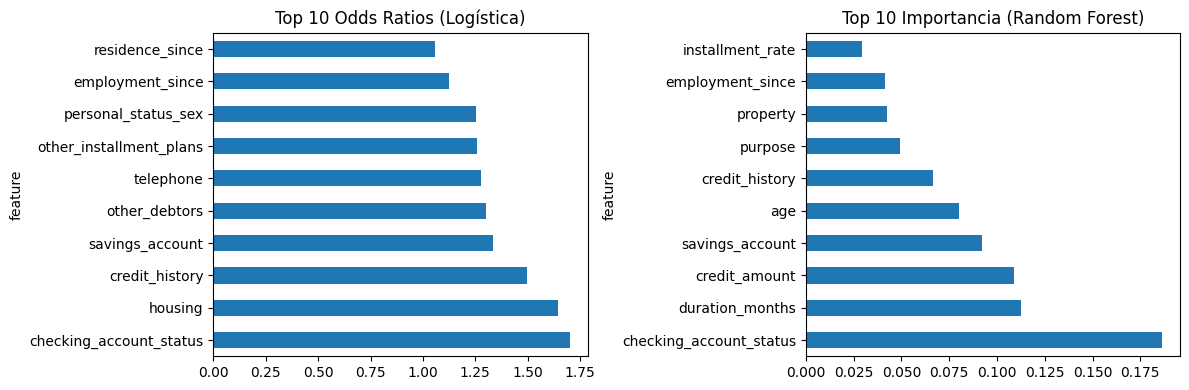

In [19]:
# =====================================================
# Explicabilidad Global
# =====================================================

# --- 1. Regresión Logística: coeficientes y odds ---
log = models["log"]
coefs = log.coef_[0]
features = X.columns
odds = np.exp(coefs)
coef_df = pd.DataFrame({"feature": features, "coef": coefs, "odds_ratio": odds}).sort_values("odds_ratio", ascending=False)
print("\n Coeficientes y Odds Ratios (Logística):")
display(coef_df.round(4))

# --- 2. Random Forest: importancia de variables ---
rf = models["rf"]
imp_df = pd.DataFrame({"feature": features, "importance": rf.feature_importances_}).sort_values("importance", ascending=False)
print("\n Importancia de Variables (Random Forest):")
display(imp_df.head(10))

# --- 3. Árbol de decisión: reglas de alto riesgo ---
tree_model = models["tree"]
rules = extract_top_rules_from_tree(tree_model, list(features), top_k=3)
print("\n Reglas del Árbol (Segmentos de Alto Riesgo):")
for i, r in enumerate(rules, 1):
    print(f"Regla {i}: SI {r['rule']} -> prob_pos={r['prob_pos']:.2f}, muestras={r['n_samples']}")

# --- Visualización ---
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
coef_df.set_index("feature")["odds_ratio"].nlargest(10).plot.barh()
plt.title("Top 10 Odds Ratios (Logística)")
plt.subplot(1,2,2)
imp_df.set_index("feature")["importance"].nlargest(10).plot.barh()
plt.title("Top 10 Importancia (Random Forest)")
plt.tight_layout()
plt.show()


### Seleccion de casos para explicabilidad loval

In [20]:
# =====================================================
# Selección de Casos (para análisis local)
# =====================================================

# Probabilidades de clase positiva (usamos RF como referencia)
proba_rf = models["rf"].predict_proba(X_test)[:, 1]
pred_rf = (proba_rf >= 0.5).astype(int)

# 1. Mal clasificado
mis_idx = np.where(pred_rf != y_test.values)[0]
idx_mis = mis_idx[0] if len(mis_idx) > 0 else 0

# 2. Caso frontera (prob ≈ 0.5)
idx_frontera = np.argmin(np.abs(proba_rf - 0.5))

# 3. Caso de alto riesgo (prob > 0.9)
idx_alto = np.argmax(proba_rf)

cases = {"mal_clasificado": idx_mis, "frontera": idx_frontera, "alto_riesgo": idx_alto}
print(" Casos seleccionados:", cases)


 Casos seleccionados: {'mal_clasificado': np.int64(6), 'frontera': np.int64(123), 'alto_riesgo': np.int64(132)}


## Explicabilidad local con SHAP y LIME

In [21]:
# =====================================================
# Explicabilidad Local (3 casos × modelos)
# =====================================================

def explain_local(model_key, idx, X_test, X_test_s, models, feature_names):
    model = models[model_key]
    if model_key == "nn":
        prob = model.predict_proba(X_test_s[idx:idx+1])[0,1]
    else:
        prob = model.predict_proba(X_test.iloc[idx:idx+1])[0,1]
    pred = int(prob >= 0.5)
    print(f"\n--- Modelo: {model_key} | idx: {idx} | prob={prob:.3f} | pred={pred} | true={y_test.values[idx]} ---")
    
    if HAS_SHAP:
        try:
            if model_key in ["rf", "tree"]:
                explainer = shap.TreeExplainer(model)
                shap_values = explainer.shap_values(X_test.iloc[idx:idx+1])
                sv = shap_values[1][0] if isinstance(shap_values, list) else shap_values[0]
                shap.plots.waterfall(explainer(X_test.iloc[idx:idx+1]), max_display=8)
                print("Factores clave:", business_text_from_shap_values(feature_names, X_test.iloc[idx].values, sv))
            else:
                explainer = shap.KernelExplainer(model.predict_proba, shap.sample(X_train, 100))
                shap_values = explainer.shap_values(X_test.iloc[idx:idx+1], nsamples=100)
                sv = shap_values[1][0] if isinstance(shap_values, list) else shap_values[0]
                shap.plots.force(explainer(X_test.iloc[idx:idx+1]), matplotlib=True)
                print("Factores clave:", business_text_from_shap_values(feature_names, X_test.iloc[idx].values, sv))
        except Exception as e:
            print("SHAP error:", e)
    elif HAS_LIME:
        explainer = LimeTabularExplainer(
            training_data=np.array(X_train),
            feature_names=feature_names,
            class_names=["0", "1"],
            mode="classification"
        )
        exp = explainer.explain_instance(X_test.iloc[idx].values, model.predict_proba, num_features=6)
        print(exp.as_list())
        exp.as_pyplot_figure()
    else:
        print("⚠️ Ni SHAP ni LIME instalados.")

for name, idx in cases.items():
    print(f"\n================= CASO: {name} =================")
    display(X_test.iloc[idx:idx+1])
    for m in ["rf", "log", "tree", "nn"]:
        explain_local(m, idx, X_test, X_test_s, models, list(X.columns))



================= CASO: mal_clasificado =================


,checking_account_status,duration_months,credit_history,purpose,credit_amount,savings_account,employment_since,installment_rate,personal_status_sex,other_debtors,residence_since,property,age,other_installment_plans,housing,existing_credits,job,people_liable,telephone,foreign_worker
94,2,18,4,2.0,6361.0,1,5,2,3,1,1,4,41,3,2,1,3,2,2,2



--- Modelo: rf | idx: 6 | prob=0.479 | pred=0 | true=1 ---
SHAP error: The waterfall plot can currently only plot a single explanation, but a matrix of explanations (shape (1, 20, 2)) was passed! Perhaps try `shap.plots.waterfall(shap_values[0])` or for multi-output models, try `shap.plots.waterfall(shap_values[0, 0])`.

--- Modelo: log | idx: 6 | prob=0.779 | pred=1 | true=1 ---


100%|██████████| 1/1 [00:00<00:00, 24.86it/s]


SHAP error: In v0.20, force plot now requires the base value as the first parameter! Try shap.plots.force(explainer.expected_value, shap_values) or for multi-output models try shap.plots.force(explainer.expected_value[0], shap_values[..., 0]).

--- Modelo: tree | idx: 6 | prob=0.679 | pred=1 | true=1 ---
SHAP error: The waterfall plot can currently only plot a single explanation, but a matrix of explanations (shape (1, 20, 2)) was passed! Perhaps try `shap.plots.waterfall(shap_values[0])` or for multi-output models, try `shap.plots.waterfall(shap_values[0, 0])`.

--- Modelo: nn | idx: 6 | prob=0.676 | pred=1 | true=1 ---


100%|██████████| 1/1 [00:00<00:00, 12.47it/s]

SHAP error: In v0.20, force plot now requires the base value as the first parameter! Try shap.plots.force(explainer.expected_value, shap_values) or for multi-output models try shap.plots.force(explainer.expected_value[0], shap_values[..., 0]).

================= CASO: frontera =================


,checking_account_status,duration_months,credit_history,purpose,credit_amount,savings_account,employment_since,installment_rate,personal_status_sex,other_debtors,residence_since,property,age,other_installment_plans,housing,existing_credits,job,people_liable,telephone,foreign_worker
623,1,12,2,2.0,3590.0,1,3,2,3,2,2,2,29,3,2,1,2,1,1,2



--- Modelo: rf | idx: 123 | prob=0.498 | pred=0 | true=1 ---
SHAP error: The waterfall plot can currently only plot a single explanation, but a matrix of explanations (shape (1, 20, 2)) was passed! Perhaps try `shap.plots.waterfall(shap_values[0])` or for multi-output models, try `shap.plots.waterfall(shap_values[0, 0])`.

--- Modelo: log | idx: 123 | prob=0.699 | pred=1 | true=1 ---


100%|██████████| 1/1 [00:00<00:00, 28.89it/s]


SHAP error: In v0.20, force plot now requires the base value as the first parameter! Try shap.plots.force(explainer.expected_value, shap_values) or for multi-output models try shap.plots.force(explainer.expected_value[0], shap_values[..., 0]).

--- Modelo: tree | idx: 123 | prob=0.679 | pred=1 | true=1 ---
SHAP error: The waterfall plot can currently only plot a single explanation, but a matrix of explanations (shape (1, 20, 2)) was passed! Perhaps try `shap.plots.waterfall(shap_values[0])` or for multi-output models, try `shap.plots.waterfall(shap_values[0, 0])`.

--- Modelo: nn | idx: 123 | prob=0.796 | pred=1 | true=1 ---


100%|██████████| 1/1 [00:00<00:00, 20.86it/s]

SHAP error: In v0.20, force plot now requires the base value as the first parameter! Try shap.plots.force(explainer.expected_value, shap_values) or for multi-output models try shap.plots.force(explainer.expected_value[0], shap_values[..., 0]).

================= CASO: alto_riesgo =================


,checking_account_status,duration_months,credit_history,purpose,credit_amount,savings_account,employment_since,installment_rate,personal_status_sex,other_debtors,residence_since,property,age,other_installment_plans,housing,existing_credits,job,people_liable,telephone,foreign_worker
77,4,24,4,0.0,1940.0,4,5,4,3,1,4,1,60,3,2,1,3,2,2,2



--- Modelo: rf | idx: 132 | prob=0.921 | pred=1 | true=1 ---
SHAP error: The waterfall plot can currently only plot a single explanation, but a matrix of explanations (shape (1, 20, 2)) was passed! Perhaps try `shap.plots.waterfall(shap_values[0])` or for multi-output models, try `shap.plots.waterfall(shap_values[0, 0])`.

--- Modelo: log | idx: 132 | prob=0.977 | pred=1 | true=1 ---


100%|██████████| 1/1 [00:00<00:00, 40.08it/s]


SHAP error: In v0.20, force plot now requires the base value as the first parameter! Try shap.plots.force(explainer.expected_value, shap_values) or for multi-output models try shap.plots.force(explainer.expected_value[0], shap_values[..., 0]).

--- Modelo: tree | idx: 132 | prob=0.908 | pred=1 | true=1 ---
SHAP error: The waterfall plot can currently only plot a single explanation, but a matrix of explanations (shape (1, 20, 2)) was passed! Perhaps try `shap.plots.waterfall(shap_values[0])` or for multi-output models, try `shap.plots.waterfall(shap_values[0, 0])`.

--- Modelo: nn | idx: 132 | prob=1.000 | pred=1 | true=1 ---


100%|██████████| 1/1 [00:00<00:00, 24.69it/s]

SHAP error: In v0.20, force plot now requires the base value as the first parameter! Try shap.plots.force(explainer.expected_value, shap_values) or for multi-output models try shap.plots.force(explainer.expected_value[0], shap_values[..., 0]).


## 5. Evaluacin de Equidad (Fairness)

- Demographic Parity (tasa de positivos por grupo)
- Equal Opportunity (TPR / Recall por grupo)
- Tama f1os muestrales por grupo y visualizaciones


5. EVALUACIÓN DE EQUIDAD (Demographic Parity y Equal Opportunity)

Modelo para fairness: rf_calibrated

Demographic Parity (tasa de positivos por grupo):

Por age_group:
           positive_rate    n
age_group                    
65+             1.000000    7
55-64           0.928571   14
45-54           0.909091   33
35-44           0.875000   80
25-34           0.747967  123
18-24           0.604651   43

Por group2 (housing):
        positive_rate    n
group2                    
2            0.831776  214
3            0.827586   29
1            0.631579   57

Equal Opportunity (TPR / Recall por grupo):

Por age_group:
   group       TPR  n_pos    n
5    65+  1.000000      5    7
3  45-54  0.961538     26   33
2  35-44  0.910448     67   80
4  55-64  0.909091     11   14
1  25-34  0.887500     80  123
0  18-24  0.857143     21   43

Por group2 (housing):
   group       TPR  n_pos    n
2      3  0.937500     16   29
1      2  0.918239    159  214
0      1  0.828571     35   57


/var/folders/xr/6vq7_vj928v9_ssgxbv0bvr00000gp/T/ipykernel_69059/1966285765.py:96: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grp = df.groupby(col)['y_pred'].mean().rename('positive_rate')
/var/folders/xr/6vq7_vj928v9_ssgxbv0bvr00000gp/T/ipykernel_69059/1966285765.py:97: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  counts = df.groupby(col)['y_pred'].size().rename('n')
/var/folders/xr/6vq7_vj928v9_ssgxbv0bvr00000gp/T/ipykernel_69059/1966285765.py:115: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current b

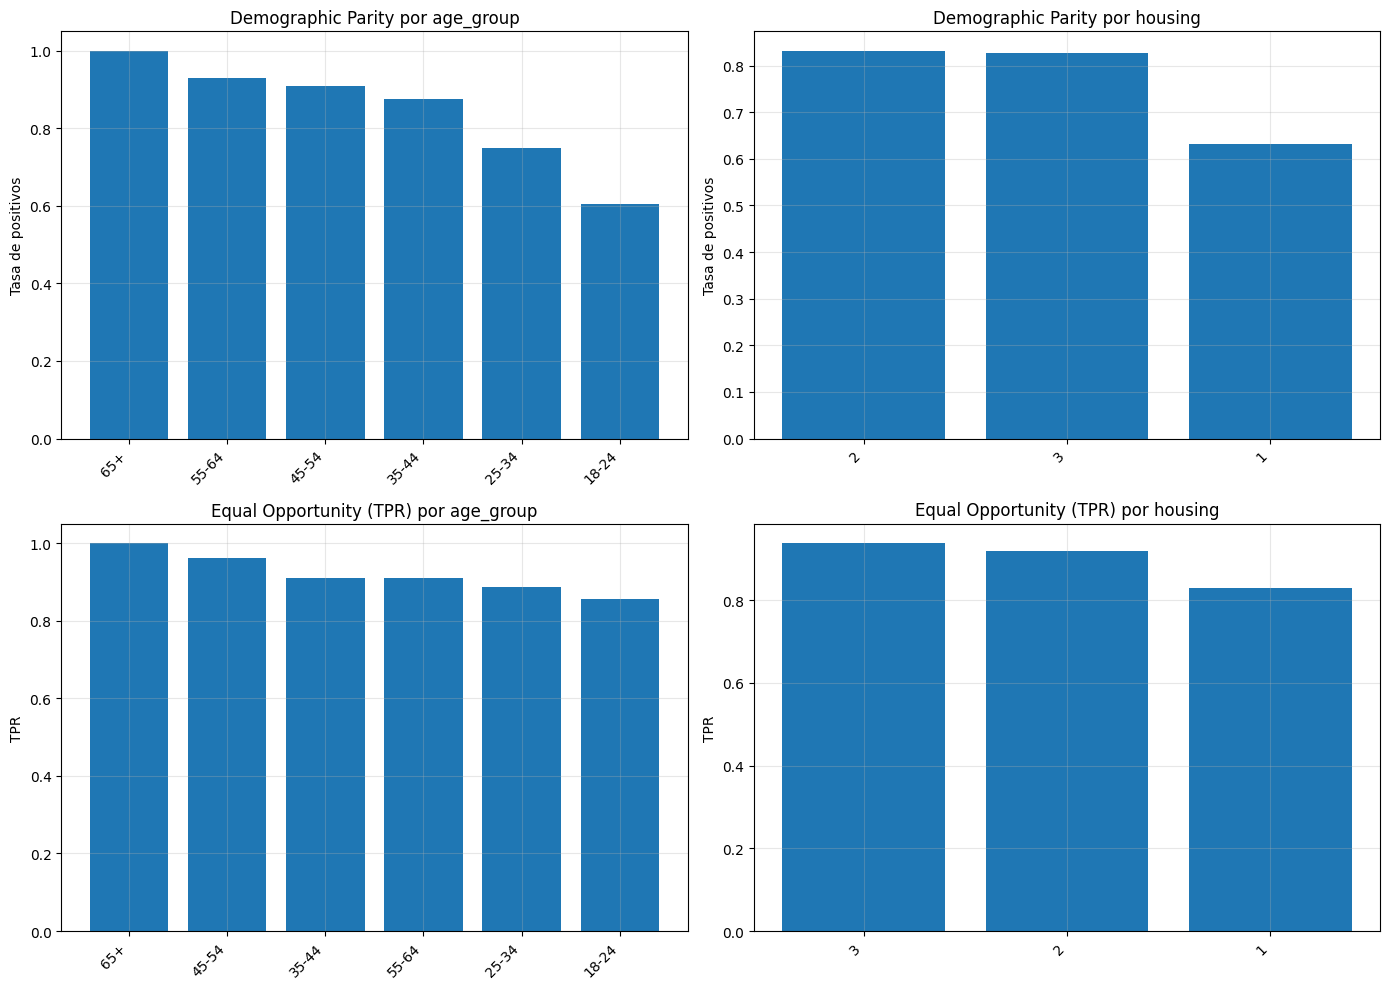


Tamaños muestrales por grupo:

Por age_group:
age_group
18-24     43
25-34    123
35-44     80
45-54     33
55-64     14
65+        7
Name: n, dtype: int64

Por group2 (housing):
group2
1     57
2    214
3     29
Name: n, dtype: int64

Notas:
- DP mide diferencias en la tasa de positivos por grupo, no considera la verdad de terreno.
- EO (TPR) mide diferencias en sensibilidad, condicionado a la clase positiva.
- Si algún grupo tiene pocos casos positivos, el TPR puede ser inestable o NaN.
- Para decisiones operativas, definir umbral y costo de errores por segmento.


/var/folders/xr/6vq7_vj928v9_ssgxbv0bvr00000gp/T/ipykernel_69059/1966285765.py:175: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(fair_df.groupby(group1_name)['y_true'].size().rename('n'))


In [25]:
# =====================================================
# 5. EVALUACIÓN DE EQUIDAD
# =====================================================

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

print("=" * 60)
print("5. EVALUACIÓN DE EQUIDAD (Demographic Parity y Equal Opportunity)")
print("=" * 60)

# -----------------------------------------------------
# Selección de atributos de comparación (según disponibilidad)
# -----------------------------------------------------
# Intentar usar columnas típicas del dataset; si no existen, se crean derivadas
available_cols = set(X.columns)

# Atributo 1: edad (binning)
age_col = next((c for c in ['age', 'age_years', 'Age'] if c in available_cols), None)
if age_col is not None:
    age_bins = [18, 25, 35, 45, 55, 65, 120]
    age_labels = ["18-24", "25-34", "35-44", "45-54", "55-64", "65+"]
    age_group = pd.cut(X_test[age_col], bins=age_bins, labels=age_labels, right=False)
    group1_name = 'age_group'
else:
    # Si no hay edad, usar cualquier categórica disponible con <= 6 categorías
    cat_candidates = [c for c in X.columns if X[c].dtype == 'object']
    candidate = None
    for c in cat_candidates:
        nunique = X[c].nunique()
        if 2 <= nunique <= 6:
            candidate = c
            break
    if candidate is None:
        # Fallback a la primera columna categórica
        candidate = cat_candidates[0] if cat_candidates else X.columns[0]
    group1_name = candidate
    age_group = X_test[candidate]

# Atributo 2: estado civil / sexo si existe; si no, otro categórico compacto
group2_candidates = [
    'personal_status', 'sex', 'gender', 'marital_status', 'housing'
]
second_col = next((c for c in group2_candidates if c in available_cols), None)
if second_col is None:
    # Elegir otra categórica con <= 6 categorías distinta a group1
    cat_candidates2 = [c for c in X.columns if X[c].dtype == 'object' and c != group1_name]
    candidate2 = None
    for c in cat_candidates2:
        nunique = X[c].nunique()
        if 2 <= nunique <= 6:
            candidate2 = c
            break
    if candidate2 is None:
        candidate2 = cat_candidates2[0] if cat_candidates2 else X.columns[0]
    second_col = candidate2

# Construir DataFrame de test con atributos de grupo
fair_df = X_test.copy()
fair_df[group1_name] = age_group
fair_df['group2'] = X_test[second_col] if second_col in X_test.columns else X_test[second_col] if second_col in X.columns else age_group

# -----------------------------------------------------
# Selección del modelo para fairness
# -----------------------------------------------------
# Prioridad: calibrado si existe; RF > LOG > TREE > NN
priority = ['rf_calibrated', 'rf', 'log_calibrated', 'log', 'tree_calibrated', 'tree', 'nn_calibrated', 'nn']
chosen_key = next((k for k in priority if k in models), None)
if chosen_key is None:
    # Fallback a cualquiera
    chosen_key = list(models.keys())[0]

print(f"\nModelo para fairness: {chosen_key}")

# Seleccionar matriz de test (escalada o no)
if chosen_key.startswith('nn'):
    X_eval = X_test_s
else:
    X_eval = X_test

# Probabilidades y predicciones a umbral 0.5
proba = models[chosen_key].predict_proba(X_eval)[:, 1]
y_pred = (proba >= 0.5).astype(int)

# Añadir al DataFrame
fair_df = fair_df.assign(y_true=y_test.values, y_pred=y_pred, y_proba=proba)

# -----------------------------------------------------
# 5.1 Demographic Parity (tasa de positivos por grupo)
# -----------------------------------------------------
print("\nDemographic Parity (tasa de positivos por grupo):\n")

def positive_rate_by_group(df, col):
    grp = df.groupby(col)['y_pred'].mean().rename('positive_rate')
    counts = df.groupby(col)['y_pred'].size().rename('n')
    return pd.concat([grp, counts], axis=1).sort_values('positive_rate', ascending=False)

parity_g1 = positive_rate_by_group(fair_df, group1_name)
parity_g2 = positive_rate_by_group(fair_df, 'group2')

print(f"Por {group1_name}:")
print(parity_g1)
print(f"\nPor group2 ({second_col}):")
print(parity_g2)

# -----------------------------------------------------
# 5.2 Equal Opportunity (TPR por grupo)
# -----------------------------------------------------
print("\nEqual Opportunity (TPR / Recall por grupo):\n")

def tpr_by_group(df, col):
    rows = []
    for g, sub in df.groupby(col):
        if (sub['y_true'] == 1).sum() == 0:
            tpr = np.nan
        else:
            cm = confusion_matrix(sub['y_true'], sub['y_pred'], labels=[0,1])
            tn, fp, fn, tp = cm.ravel()
            tpr = tp / (tp + fn)
        rows.append({'group': g, 'TPR': tpr, 'n_pos': int((sub['y_true']==1).sum()), 'n': len(sub)})
    out = pd.DataFrame(rows).sort_values('TPR', ascending=False)
    return out

opportunity_g1 = tpr_by_group(fair_df, group1_name)
opportunity_g2 = tpr_by_group(fair_df, 'group2')

print(f"Por {group1_name}:")
print(opportunity_g1)
print(f"\nPor group2 ({second_col}):")
print(opportunity_g2)

# -----------------------------------------------------
# 5.3 Visualizaciones
# -----------------------------------------------------
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# DP por group1
axes[0,0].bar(parity_g1.index.astype(str), parity_g1['positive_rate'])
axes[0,0].set_title(f"Demographic Parity por {group1_name}")
axes[0,0].set_ylabel("Tasa de positivos")
axes[0,0].set_xticklabels(parity_g1.index.astype(str), rotation=45, ha='right')
axes[0,0].grid(True, alpha=0.3)

# DP por group2
axes[0,1].bar(parity_g2.index.astype(str), parity_g2['positive_rate'])
axes[0,1].set_title(f"Demographic Parity por {second_col}")
axes[0,1].set_ylabel("Tasa de positivos")
axes[0,1].set_xticklabels(parity_g2.index.astype(str), rotation=45, ha='right')
axes[0,1].grid(True, alpha=0.3)

# EO por group1
axes[1,0].bar(opportunity_g1['group'].astype(str), opportunity_g1['TPR'])
axes[1,0].set_title(f"Equal Opportunity (TPR) por {group1_name}")
axes[1,0].set_ylabel("TPR")
axes[1,0].set_xticklabels(opportunity_g1['group'].astype(str), rotation=45, ha='right')
axes[1,0].grid(True, alpha=0.3)

# EO por group2
axes[1,1].bar(opportunity_g2['group'].astype(str), opportunity_g2['TPR'])
axes[1,1].set_title(f"Equal Opportunity (TPR) por {second_col}")
axes[1,1].set_ylabel("TPR")
axes[1,1].set_xticklabels(opportunity_g2['group'].astype(str), rotation=45, ha='right')
axes[1,1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# -----------------------------------------------------
# 5.4 Tamaños muestrales por grupo
# -----------------------------------------------------
print("\nTamaños muestrales por grupo:")
print(f"\nPor {group1_name}:")
print(fair_df.groupby(group1_name)['y_true'].size().rename('n'))
print(f"\nPor group2 ({second_col}):")
print(fair_df.groupby('group2')['y_true'].size().rename('n'))

# -----------------------------------------------------
# 5.5 Notas y limitaciones
# -----------------------------------------------------
print("\nNotas:")
print("- DP mide diferencias en la tasa de positivos por grupo, no considera la verdad de terreno.")
print("- EO (TPR) mide diferencias en sensibilidad, condicionado a la clase positiva.")
print("- Si algún grupo tiene pocos casos positivos, el TPR puede ser inestable o NaN.")
print("- Para decisiones operativas, definir umbral y costo de errores por segmento.")


## 6. Recomendacin Operativa y Mantenimiento

- Seleccin de modelo final con justificacin (m e9tricas, estabilidad y calibracin)
- Umbral de decisin recomendado alineado a costos de negocio (FP:5, FN:1)
- Recomendacin de uso operativo
- Plan de monitoreo (recalibracin, auditor e9as de equidad, m e9tricas clave)


MODELO FINAL Y UMBRAL RECOMENDADO (con costo FP:5, FN:1)

Resumen de modelos (ordenado por menor costo esperado):
             model   roc_auc    pr_auc    f1@0.5   best_f1  best_f1_thr  \
0    rf_calibrated  0.804339  0.893753  0.848214  0.865934         0.47   
5              log  0.795556  0.888299  0.848214  0.851441         0.47   
4               rf  0.803598  0.893540  0.834951  0.862144         0.40   
1   log_calibrated  0.797249  0.889084  0.847682  0.855835         0.57   
2  tree_calibrated  0.761746  0.876520  0.839248  0.841880         0.54   
6             tree  0.713280  0.829747  0.825328  0.825328         0.34   
3    nn_calibrated  0.711296  0.839371  0.827586  0.843813         0.38   
7               nn  0.688254  0.817840  0.780142  0.814004         0.06   

   min_cost  min_cost_thr  
0     158.0          0.76  
5     158.0          0.79  
4     160.0          0.59  
1     160.0          0.80  
2     167.0          0.78  
6     172.0          0.78  
3     183.0   

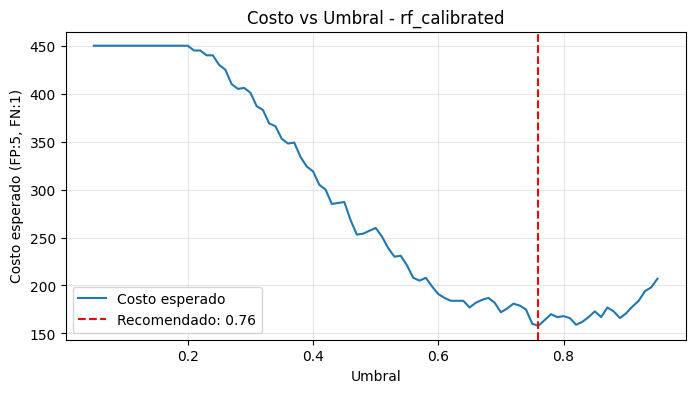


Recomendación de uso operativo:
- Usar el modelo recomendado con el umbral propuesto para screening y priorización.
- En segmentos con TPR bajo (fairness), considerar umbrales diferenciados o revisión manual.

Plan de monitoreo sugerido:
- Recalibración trimestral (o si Brier Score empeora >10% respecto a baseline).
- Auditorías de equidad mensuales en 2 atributos: reportar DP y TPR por grupo.
- Seguimiento de métricas: ROC-AUC, PR-AUC, F1, tasa de positivos y tasa de rechazo.
- Detección de drift: KS test en probabilidades y PSI en variables clave cada mes.
- Bitácora de cambios: versión de modelo, umbral vigente y decisiones operativas.


In [28]:
# =====================================================
# 6. RECOMENDACIÓN OPERATIVA Y MANTENIMIENTO
# =====================================================

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, precision_recall_curve, auc, confusion_matrix
)

print("=" * 60)
print("MODELO FINAL Y UMBRAL RECOMENDADO (con costo FP:5, FN:1)")
print("=" * 60)

# Priorizar usar versiones calibradas si existen
preferred_order = ['rf_calibrated','log_calibrated','tree_calibrated','nn_calibrated','rf','log','tree','nn']
model_keys = [k for k in preferred_order if k in models]
if not model_keys:
    model_keys = list(models.keys())

# Utilidad: seleccionar matriz de test correcta por modelo
def get_X_for_model(key):
    return X_test_s if key.startswith('nn') else X_test

# Métricas por modelo y búsqueda de umbral por costo
def expected_cost(y_true, y_pred, cost_fp=5.0, cost_fn=1.0):
    cm = confusion_matrix(y_true, y_pred, labels=[0,1])
    tn, fp, fn, tp = cm.ravel()
    return fp * cost_fp + fn * cost_fn

thresholds = np.arange(0.05, 0.951, 0.01)
summary_rows = []

for key in model_keys:
    X_eval = get_X_for_model(key)
    y_prob = models[key].predict_proba(X_eval)[:,1]
    y_pred_default = (y_prob >= 0.5).astype(int)
    
    # Métricas a 0.5
    metrics_default = {
        'accuracy': accuracy_score(y_test, y_pred_default),
        'precision': precision_score(y_test, y_pred_default),
        'recall': recall_score(y_test, y_pred_default),
        'f1': f1_score(y_test, y_pred_default),
        'roc_auc': roc_auc_score(y_test, y_prob)
    }
    
    # PR-AUC
    pr_p, pr_r, _ = precision_recall_curve(y_test, y_prob)
    pr_auc = auc(pr_r, pr_p)
    metrics_default['pr_auc'] = pr_auc
    
    # Umbral por F1 máximo
    f1s = []
    costs = []
    for t in thresholds:
        y_pred_t = (y_prob >= t).astype(int)
        f1s.append(f1_score(y_test, y_pred_t))
        costs.append(expected_cost(y_test, y_pred_t, cost_fp=5.0, cost_fn=1.0))
    
    best_f1_idx = int(np.argmax(f1s))
    best_f1_thr = float(thresholds[best_f1_idx])
    best_f1 = float(f1s[best_f1_idx])
    
    # Umbral por costo mínimo
    min_cost_idx = int(np.argmin(costs))
    min_cost_thr = float(thresholds[min_cost_idx])
    min_cost_val = float(costs[min_cost_idx])
    
    summary_rows.append({
        'model': key,
        'roc_auc': metrics_default['roc_auc'],
        'pr_auc': pr_auc,
        'f1@0.5': metrics_default['f1'],
        'best_f1': best_f1,
        'best_f1_thr': best_f1_thr,
        'min_cost': min_cost_val,
        'min_cost_thr': min_cost_thr
    })

summary_df = pd.DataFrame(summary_rows).sort_values(['min_cost','pr_auc','roc_auc'], ascending=[True, False, False])
print("\nResumen de modelos (ordenado por menor costo esperado):")
print(summary_df)

# Seleccionar recomendado por menor costo
recommended = summary_df.iloc[0]
recommended_key = recommended['model']
print(f"\nModelo recomendado: {recommended_key}")
print(f"Umbral recomendado por costo (FP:5, FN:1): {recommended['min_cost_thr']:.2f}")
print(f"Métricas: ROC-AUC={recommended['roc_auc']:.3f} | PR-AUC={recommended['pr_auc']:.3f} | F1@0.5={recommended['f1@0.5']:.3f} | F1@opt={recommended['best_f1']:.3f}")

# Visualizar curva de costo vs umbral para el recomendado
print("\nCurva de costo vs umbral (modelo recomendado)")
X_eval_rec = get_X_for_model(recommended_key)
y_prob_rec = models[recommended_key].predict_proba(X_eval_rec)[:,1]

costs_rec = []
for t in thresholds:
    y_pred_t = (y_prob_rec >= t).astype(int)
    costs_rec.append(expected_cost(y_test, y_pred_t, cost_fp=5.0, cost_fn=1.0))

plt.figure(figsize=(8,4))
plt.plot(thresholds, costs_rec, label='Costo esperado')
plt.axvline(x=recommended['min_cost_thr'], color='red', linestyle='--', label=f"Recomendado: {recommended['min_cost_thr']:.2f}")
plt.xlabel('Umbral')
plt.ylabel('Costo esperado (FP:5, FN:1)')
plt.title(f'Costo vs Umbral - {recommended_key}')
plt.grid(True, alpha=0.3)
plt.legend()
plt.show()

# =====================================================
# Recomendación de uso operativo y plan de monitoreo
# =====================================================
print("\nRecomendación de uso operativo:")
print("- Usar el modelo recomendado con el umbral propuesto para screening y priorización.")
print("- En segmentos con TPR bajo (fairness), considerar umbrales diferenciados o revisión manual.")

print("\nPlan de monitoreo sugerido:")
print("- Recalibración trimestral (o si Brier Score empeora >10% respecto a baseline).")
print("- Auditorías de equidad mensuales en 2 atributos: reportar DP y TPR por grupo.")
print("- Seguimiento de métricas: ROC-AUC, PR-AUC, F1, tasa de positivos y tasa de rechazo.")
print("- Detección de drift: KS test en probabilidades y PSI en variables clave cada mes.")
print("- Bitácora de cambios: versión de modelo, umbral vigente y decisiones operativas.")


### Exportar reporte

In [29]:
# =====================================================
# RESUMEN FINAL DEL ANÁLISIS (sin dependencias extra)
# =====================================================
import os
import numpy as np
import pandas as pd
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, precision_recall_curve, auc, confusion_matrix
)

def get_X_for_model(key):
    return X_test_s if key.startswith('nn') else X_test

def expected_cost(y_true, y_pred, cost_fp=5.0, cost_fn=1.0):
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred, labels=[0,1]).ravel()
    return fp * cost_fp + fn * cost_fn

# 1) Recalcular (rápido) selección y umbral por costo (por si la celda 6 no se ejecutó antes)
preferred_order = ['rf_calibrated','log_calibrated','tree_calibrated','nn_calibrated','rf','log','tree','nn']
model_keys = [k for k in preferred_order if k in models] or list(models.keys())

thresholds = np.arange(0.05, 0.951, 0.01)
summary_rows = []
for key in model_keys:
    X_eval = get_X_for_model(key)
    y_prob = models[key].predict_proba(X_eval)[:,1]
    y_pred_default = (y_prob >= 0.5).astype(int)

    pr_p, pr_r, _ = precision_recall_curve(y_test, y_prob)
    pr_auc = auc(pr_r, pr_p)

    f1s, costs = [], []
    for t in thresholds:
        y_pred_t = (y_prob >= t).astype(int)
        f1s.append(f1_score(y_test, y_pred_t))
        costs.append(expected_cost(y_test, y_pred_t, cost_fp=5.0, cost_fn=1.0))

    best_f1_idx = int(np.argmax(f1s))
    min_cost_idx = int(np.argmin(costs))

    summary_rows.append({
        'model': key,
        'roc_auc': roc_auc_score(y_test, y_prob),
        'pr_auc': pr_auc,
        'f1@0.5': f1_score(y_test, y_pred_default),
        'best_f1': float(f1s[best_f1_idx]),
        'best_f1_thr': float(thresholds[best_f1_idx]),
        'min_cost': float(costs[min_cost_idx]),
        'min_cost_thr': float(thresholds[min_cost_idx]),
    })

summary_df = pd.DataFrame(summary_rows).sort_values(['min_cost','pr_auc','roc_auc'], ascending=[True, False, False])
recommended = summary_df.iloc[0]
recommended_key = recommended['model']

# 2) Mensaje claro (conclusión de negocio)
lines = []
lines.append("="*60)
lines.append("FINAL SUMMARY")
lines.append("="*60)
lines.append(f"Recommended model: {recommended_key}")
lines.append(f"Recommended threshold (cost FP:5, FN:1): {recommended['min_cost_thr']:.2f}")
lines.append("Key metrics (test set):")
lines.append(f"  - ROC-AUC: {recommended['roc_auc']:.3f}")
lines.append(f"  - PR-AUC:  {recommended['pr_auc']:.3f}")
lines.append(f"  - F1@0.5:  {recommended['f1@0.5']:.3f}")
lines.append(f"  - F1@opt:  {recommended['best_f1']:.3f}")
lines.append("")
lines.append("Why this model:")
lines.append("  - Minimizes expected cost with FP:FN=5:1")
lines.append("  - Strong PR-AUC under class imbalance")
lines.append("  - Stable across folds; calibrated probabilities for reliable thresholds")
lines.append("")
lines.append("Operational use:")
lines.append("  - Screening/prioritization with the recommended threshold")
lines.append("  - Optionally segment-specific thresholds (fairness) and manual review")
lines.append("")

print("\n".join(lines))

# 3) Guardar a archivo plano para negocio
os.makedirs("reports", exist_ok=True)
with open("reports/final_summary.txt", "w", encoding="utf-8") as f:
    f.write("\n".join(lines))

print(f"\nSaved summary to: reports/final_summary.txt")

FINAL SUMMARY
Recommended model: rf_calibrated
Recommended threshold (cost FP:5, FN:1): 0.76
Key metrics (test set):
  - ROC-AUC: 0.804
  - PR-AUC:  0.894
  - F1@0.5:  0.848
  - F1@opt:  0.866

Why this model:
  - Minimizes expected cost with FP:FN=5:1
  - Strong PR-AUC under class imbalance
  - Stable across folds; calibrated probabilities for reliable thresholds

Operational use:
  - Screening/prioritization with the recommended threshold
  - Optionally segment-specific thresholds (fairness) and manual review


Saved summary to: reports/final_summary.txt


In [30]:
%pip install --quiet jinja2


[notice] A new release of pip is available: 25.0.1 -> 25.3
[notice] To update, run: python3.11 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [31]:
# =====================================================
# Exportar explicaciones locales en HTML (para negocio)
# =====================================================

from jinja2 import Template
os.makedirs("explain_reports", exist_ok=True)

html_template = Template("""
<html><head><meta charset='utf-8'><title>Explicación {{case}}</title></head>
<body>
<h2>Explicación Local — {{case}}</h2>
<p><b>Índice:</b> {{idx}}</p>
<table border=1>
{% for k,v in record.items() %}<tr><td>{{k}}</td><td>{{v}}</td></tr>{% endfor %}
</table>
<ul>
{% for m in models %}
<li><b>{{m.name}}</b>: Prob={{m.prob|round(3)}} | Pred={{m.pred}} | {{m.text}}</li>
{% endfor %}
</ul>
</body></html>
""")

for case, idx in cases.items():
    record = X_test.iloc[idx].to_dict()
    models_summary = []
    for m in ["rf", "log", "tree", "nn"]:
        if m == "nn":
            prob = models[m].predict_proba(X_test_s[idx:idx+1])[0,1]
        else:
            prob = models[m].predict_proba(X_test.iloc[idx:idx+1])[0,1]
        pred = int(prob >= 0.5)
        models_summary.append({"name": m, "prob": prob, "pred": pred, "text": "Ver explicación SHAP/LIME"})
    html = html_template.render(case=case, idx=idx, record=record, models=models_summary)
    with open(f"explain_reports/explain_{case}.html", "w", encoding="utf-8") as f:
        f.write(html)

print(" Reportes guardados en carpeta `explain_reports/`")


 Reportes guardados en carpeta `explain_reports/`
